In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install librosa

In [4]:
import librosa
from librosa import display

In [5]:
% pylab inline
import os
import pandas as pd
import glob

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [7]:
!pip install transformers

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import math

labels_df = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/df_iemocap.csv')
iemocap_dir = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/'

In [10]:
local_emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from IPython.display import display

%matplotlib inline

In [12]:
#df_audio_basic = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')

In [13]:
#df_audio_mfcc = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_mfcc_chroma_mel.csv')

In [14]:
#df_audio_complete = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_complete.csv')

In [15]:
#df_text_train = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_train.csv')
#df_text_test = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_test.csv')
#df_text = pd.merge(df_text_train, df_text_test, on=['wav_file','label'])

In [16]:
#audiocode2text = pickle.load(open('/content/drive/My Drive/IEMOCAP/pre-processed/audiocode2text.pkl', 'rb'))

In [17]:
import unicodedata

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [18]:
#df_text_complete = pd.DataFrame()
#df_text_complete['wav_file'] = df_audio_complete['wav_file']
#df_text_complete['label'] = df_audio_complete['label']
#df_text_complete['transcription'] = [normalizeString(audiocode2text[code]) for code in df_audio_complete['wav_file']]

In [19]:
#df_text_complete.head()

In [20]:
#df_text_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_transcription_complete.csv', index=False)

In [21]:
#df_audio_text_complete = pd.merge(df_audio_complete, df_text_complete, on=['wav_file','label'])

In [22]:
#df_audio_text_complete.drop(columns=['Unnamed: 0'],inplace=True)

In [23]:
#df_audio_text_complete.head()

In [24]:
#df_audio_text_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_complete.csv',index=False)

In [25]:
df_audio_text_complete_init_end = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_features_complete_init_end.csv')

In [26]:
df_audio_text_complete_init_end.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,8,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.5

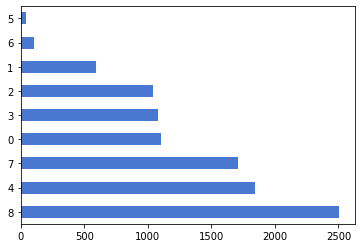

In [27]:
df_audio_text_complete_init_end['label'].value_counts().plot.barh()

In [28]:
#df_audio_com = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df_audio_text_subset = df_audio_text_complete_init_end[df_audio_text_complete_init_end['label'].isin([0, 1, 2, 3, 4, 7])]
print(df_audio_text_subset.shape)
display(df_audio_text_subset.head())

# change 7 to 2
df_audio_text_subset['label'] = df_audio_text_subset['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 7: 3})
df_audio_text_subset.head()

(7376, 527)


,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
4,Ses01F_script02_1_F004,7,0.012753,0.004442,0.018505,0.008608,0.016044,0.005856,0.009171,0.006261,0.202532,0.455696,-0.003753,-0.001330,0.223784,0.417070,0.059571,0.083392,-464.95600,214.36331,-30.848808,20.951689,30.019796,-21.226885,7.795550,2.918576,-18.244328,0.655084,0.530733,-1.018557,1.864121,-7.877954,-0.544584,2.143899,-4.663166,5.289899,3.470439,-4.767123,-524.02893,210.10057,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160e-12,8.884044e-12,8.086514e-12,7.390374e-12,6.768016e-12,6.216335e-12,5.733447e-12,5.305424e-12,4.927710e-12,4.594281e-12,4.303201e-12,4.047733e-12,3.829726e-12,3.642896e-12,3.485019e-12,3.357307e-12,3.255739e-12,3.183068e-12,3.140098e-12,that s not your flashlight .
6,Ses01F_script02_1_F006,0,0.021766,0.021017,0.034068,0.031792,0.027161,0.026055,0.020734,0.018160,0.329114,0.240506,-0.024296,-0.008465,0.809509,2.132006,0.687731,0.916240,-414.33460,183.77113,-32.364235,13.838546,33.422497,-16.194292,-2.689702,0.944031,-11.708413,-1.653084,-6.590980,-9.907105,-1.130030,-3.185270,-2.965398,-2.082942,-3.004027,0.366705,-5.269041,-8.042662,-425.51180,197.22594,...,0.000090,0.000045,0.000013,3.787864e-06,6.839119e-07,6.374818e-08,1.887366e-08,1.516361e-08,1.329977e-08,

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,3,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
4,Ses01F_script02_1_F004,3,0.012753,0.004442,0.018505,0.008608,0.016044,0.005856,0.009171,0.006261,0.202532,0.455696,-0.003753,-0.001330,0.223784,0.417070,0.059571,0.083392,-464.95600,214.36331,-30.848808,20.951689,30.019796,-21.226885,7.795550,2.918576,-18.244328,0.655084,0.530733,-1.018557,1.864121,-7.877954,-0.544584,2.143899,-4.663166,5.289899,3.470439,-4.767123,-524.02893,210.10057,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160e-12,8.884044e-12,8.086514e-12,7.390374e-12,6.768016e-12,6.216335e-12,5.733447e-12,5.305424e-12,4.927710e-12,4.594281e-12,4.303201e-12,4.047733e-12,3.829726e-12,3.642896e-12,3.485019e-12,3.357307e-12,3.255739e-12,3.183068e-12,3.140098e-12,that s not your flashlight .
6,Ses01F_script02_1_F006,0,0.021766,0.021017,0.034068,0.031792,0.027161,0.026055,0.020734,0.018160,0.329114,0.240506,-0.024296,-0.008465,0.809509,2.132006,0.687731,0.916240,-414.33460,183.77113,-32.364235,13.838546,33.422497,-16.194292,-2.689702,0.944031,-11.708413,-1.653084,-6.590980,-9.907105,-1.130030,-3.185270,-2.965398,-2.082942,-3.004027,0.366705,-5.269041,-8.042662,-425.51180,197.22594,...,0.000090,0.000045,0.000013,3.787864e-06,6.839119e-07,6.374818e-08,1.887366e-08,1.516361e-08,1.329977e-08,

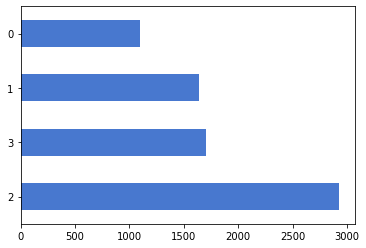

In [29]:
df_audio_text_subset['label'].value_counts().plot.barh()

In [30]:
#df_audio_com = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df_audio_text_fullset = df_audio_text_complete_init_end.copy()
# print(df_audio_text_subset.shape)
# display(df_audio_text_subset.head())

# change 7 to 2
df_audio_text_fullset['label'] = df_audio_text_fullset['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6})
df_audio_text_fullset.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,6,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,4,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.5

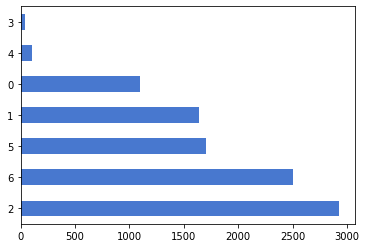

In [31]:
df_audio_text_fullset['label'].value_counts().plot.barh()

In [32]:
df_audio_text_subset.columns[2:-1]

Index(['sig_mean_1', 'sig_mean_2', 'sig_std_1', 'sig_std_2', 'rmse_mean_1',
       'rmse_mean_2', 'rmse_std_1', 'rmse_std_2', 'silence_1', 'silence_2',
       ...
       'Var_171', 'Var_172', 'Var_173', 'Var_174', 'Var_175', 'Var_176',
       'Var_177', 'Var_178', 'Var_179', 'Var_180'],
      dtype='object', length=524)

In [33]:
#scalar = StandardScaler()
#df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])
df_audio_text_subset.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,3,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
4,Ses01F_script02_1_F004,3,0.012753,0.004442,0.018505,0.008608,0.016044,0.005856,0.009171,0.006261,0.202532,0.455696,-0.003753,-0.001330,0.223784,0.417070,0.059571,0.083392,-464.95600,214.36331,-30.848808,20.951689,30.019796,-21.226885,7.795550,2.918576,-18.244328,0.655084,0.530733,-1.018557,1.864121,-7.877954,-0.544584,2.143899,-4.663166,5.289899,3.470439,-4.767123,-524.02893,210.10057,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160e-12,8.884044e-12,8.086514e-12,7.390374e-12,6.768016e-12,6.216335e-12,5.733447e-12,5.305424e-12,4.927710e-12,4.594281e-12,4.303201e-12,4.047733e-12,3.829726e-12,3.642896e-12,3.485019e-12,3.357307e-12,3.255739e-12,3.183068e-12,3.140098e-12,that s not your flashlight .
6,Ses01F_script02_1_F006,0,0.021766,0.021017,0.034068,0.031792,0.027161,0.026055,0.020734,0.018160,0.329114,0.240506,-0.024296,-0.008465,0.809509,2.132006,0.687731,0.916240,-414.33460,183.77113,-32.364235,13.838546,33.422497,-16.194292,-2.689702,0.944031,-11.708413,-1.653084,-6.590980,-9.907105,-1.130030,-3.185270,-2.965398,-2.082942,-3.004027,0.366705,-5.269041,-8.042662,-425.51180,197.22594,...,0.000090,0.000045,0.000013,3.787864e-06,6.839119e-07,6.374818e-08,1.887366e-08,1.516361e-08,1.329977e-08,

In [34]:
X_audio_text=df_audio_text_subset.drop(columns=['wav_file','label'])
y_audio_text=df_audio_text_subset['label']

In [35]:
y_audio_text.head()

0    3
1    2
4    3
6    0
7    0
Name: label, dtype: int64

In [36]:
emotion_dict_new = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'neu': 3}

emo_keys_new = list(['ang', 'hap', 'sad', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict_new))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys_new)

In [37]:
X_train_val_split, X_test_split, y_train_val_split, y_test_split = train_test_split(X_audio_text,y_audio_text, test_size=0.20,random_state=100,stratify=y_audio_text)

In [38]:
X_train_val_split.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
5466,0.000881,0.011281,0.001210,0.015326,0.001087,0.014115,0.000549,0.005941,0.000000,0.063291,-0.009075,0.010875,0.000906,0.002558,0.142943,0.193435,-688.36880,222.20253,-32.538113,20.786000,24.768505,-15.790645,23.797650,11.689494,-8.349767,9.034696,-2.863165,-1.343595,9.632906,-2.258038,1.536715,2.534551,-6.355250,1.847288,2.336168,-4.071097,-484.23294,223.46013,-48.663002,-2.275331,...,1.995258e-05,9.425613e-06,3.953628e-06,1.058421e-06,1.490070e-07,1.540527e-08,6.881644e-10,2.593459e-11,1.440206e-11,1.258507e-11,1.107223e-11,9.747245e-12,8.628613e-12,7.656955e-12,6.805223e-12,6.072269e-12,5.433734e-12,4.869066e-12,4.376464e-12,3.942751e-12,3.562204e-12,3.227989e-12,2.929800e-12,2.671469e-12,2.441062e-12,2.236605e-12,2.058774e-12,1.901106e-12,1.762872e-12,1.641179e-12,1.535610e-12,1.443367e-12,1.363116e-12,1.295790e-12,1.238892e-12,1.192515e-12,1.156045e-12,1.130150e-12,1.113975e-12,no . nobody in my house better dare and challe...
7900,0.002017,0.006500,0.004081,0.008449,0.002633,0.008054,0.003133,0.002625,0.417722,0.075949,-0.008549,0.004879,0.013676,0.024195,0.040919,0.066107,-619.56680,200.08727,-25.952112,16.978168,24.352503,-17.475698,16.938879,12.304371,-11.586005,6.500760,0.756082,-4.711986,10.445127,4.260560,0.954828,5.020195,-0.487000,4.576820,5.880748,-2.769948,-540.03357,216.39919,-36.751420,25.065348,...,1.255039e-05,8.026245e-06,4.424731e-06,6.635078e-07,4.718786e-08,5.013315e-09,5.633660e-10,2.905530e-11,1.491294e-11,1.310205e-11,1.182960e-11,1.074431e-11,9.813663e-12,8.971402e-12,8.197595e-12,7.503846e-12,6.872938e-12,6.294374e-12,5.768903e-12,5.289166e-12,4.855266e-12,4.465760e-12,4.109723e-12,3.795013e-12,3.507327e-12,3.247328e-12,3.017357e-12,2.808556e-12,2.624985e-12,2.461767e-12,2.316466e-12,2.189775e-12,2.079260e-12,1.985361e-12,1.905630e-12,1.840108e-12,1.786968e-12,1.748774e-12,1.726011e-12,you knew there was nothing .
4725,0.001076,0.002605,0.001702,0.003881,0.001333,0.003271,0.001086,0.002065,0.012658,0.240506,-0.007340,-0.006579,0.002057,0.008885,0.010115,0.017950,-652.33813,204.62260,-44.864440,17.168396,31.066353,-13.888102,17.566053,10.052573,-5.982108,9.916738,-3.811696,-3.643689,8.843693,-1.383013,3.133621,4.748509,-5.203528,1.453335,-1.161028,-7.353832,-598.38430,215.29126,-54.050423,14.968992,...,9.790140e-07,8.002335e-07,3.077175e-07,1.091334e-07,1.432488e-08,3.602507e-09,4.985803e-10,1.816460e-11,5.855612e-12,5.054880e-12,4.432856e-12,3.897540e-12,3.446110e-12,3.053317e-12,2.709265e-12,2.412865e-12,2.154280e-12,1.926724e-12,1.728188e-12,1.553970e-12,1.400933e-12,1.267156e-12,1.148063e-12,1.044928e-12,9.532201e-13,8.723667e-13,8.017962e-13,7.394363e-13,6.847158e-13,6.368470e-13,5.951970e-13,5.588927e-13,5.275626e-13,5.010850e-13,4.787546e-13,4.607392e-13,4.464283e-13,4.361617e-13,4.298718e-13,yeah .
5051,0.007700,0.000865,0.014052,0.001284,0.009938,0.001089,0.009887,0.000686,0.215190,0.000000,-0.006185,-0.011291,0.153919,0.273524,0.001109,0.002166,-495.85266,193.41956,-23.019218,7.061632,20.499624,-20.315084,6.675804,11.212791,-13.878709,-5.398656,-3.834779,-5.790093,3.545431,-2.456368,-3.160081,4.158849,-2.535704,-4.565463,-2.642812,-7.026391,-664.71765,219.13078,-53.104850,26.831024,...,1.414341e-05,4.394268e-06,2.014812e

In [39]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_val_split,y_train_val_split, test_size=0.20,random_state=100,stratify=y_train_val_split)

In [40]:
X_train_split.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
4477,0.007848,0.010493,0.012955,0.016467,0.009982,0.013491,0.008161,0.009768,0.000000,0.329114,-0.002707,0.004620,0.123089,0.183302,0.191023,0.266517,-425.77988,210.11165,-67.398964,24.609970,29.281160,-30.863026,14.948698,1.271174,-17.415890,9.950524,-9.244934,-10.690365,5.171378,-7.758155,4.510071,9.402601,-6.336035,2.677529,-0.909795,-8.214538,-407.97940,214.20703,-68.689620,21.370950,...,0.000423,2.969191e-04,1.119544e-04,1.952843e-05,2.486353e-06,1.916973e-07,2.729151e-09,1.320841e-10,1.088673e-10,9.653708e-11,8.566129e-11,7.574962e-11,6.716190e-11,5.957405e-11,5.287076e-11,4.706997e-11,4.199545e-11,3.752204e-11,3.361832e-11,3.019451e-11,2.718921e-11,2.456402e-11,2.222958e-11,2.021121e-11,1.841814e-11,1.683956e-11,1.546258e-11,1.424714e-11,1.318230e-11,1.225208e-11,1.144211e-11,1.073778e-11,1.013036e-11,9.616977e-12,9.184118e-12,8.834966e-12,8.558426e-12,8.360050e-12,8.238057e-12,okay . they can figure out pink for you . so g...
4196,0.007394,0.004763,0.014074,0.008983,0.009380,0.006109,0.010397,0.006544,0.518987,0.417722,-0.003608,-0.007686,0.155598,0.154729,0.063993,0.080070,-543.32324,194.99597,-28.364298,-3.784902,18.374266,-16.246416,6.917491,16.884900,-5.381816,-6.690430,-4.283611,-0.791186,5.531401,2.207592,-0.566883,-4.815420,-5.532992,4.218445,1.696148,-7.080668,-542.57635,202.18090,-34.195908,12.219293,...,0.000037,1.568842e-05,5.996956e-06,1.323267e-06,2.253413e-07,1.100410e-08,1.304833e-09,4.550366e-10,3.498163e-10,2.792675e-10,2.278132e-10,1.879736e-10,1.572739e-10,1.328042e-10,1.129921e-10,9.698824e-11,8.381687e-11,7.282858e-11,6.366709e-11,5.594873e-11,4.941355e-11,4.387582e-11,3.909795e-11,3.505732e-11,3.155133e-11,2.852604e-11,2.593273e-11,2.367929e-11,2.173260e-11,2.005374e-11,1.860888e-11,1.736344e-11,1.629972e-11,1.540704e-11,1.466057e-11,1.406022e-11,1.358754e-11,1.324859e-11,1.304204e-11,i m not in the least bit drunk .
6141,0.000933,0.002970,0.001182,0.005278,0.001153,0.003857,0.000254,0.003565,0.000000,0.443038,-0.015308,-0.015708,0.000773,0.002041,0.021386,0.031238,-707.71405,233.91278,-29.678926,32.850640,28.684168,-16.790424,23.185990,5.533411,-8.713664,13.609483,-2.354976,-1.999365,7.158815,-3.325128,3.909700,5.859297,1.876405,7.923640,1.367259,-1.285458,-600.38574,213.60547,-28.141323,10.617950,...,0.000001,6.761455e-07,2.754190e-07,1.228184e-07,2.220288e-08,3.357031e-09,4.904254e-10,1.118059e-11,1.231595e-12,1.047175e-12,9.103771e-13,8.006569e-13,7.130539e-13,6.392309e-13,5.753749e-13,5.204842e-13,4.722850e-13,4.291999e-13,3.909142e-13,3.566948e-13,3.260244e-13,2.987968e-13,2.739689e-13,2.521521e-13,2.324657e-13,2.147681e-13,1.991327e-13,1.850985e-13,1.726839e-13,1.616158e-13,1.519673e-13,1.434853e-13,1.360937e-13,1.297891e-13,1.244564e-13,1.200994e-13,1.166218e-13,1.141528e-13,1.126293e-13,there s nothing i can do . i i
8830,0.009847,0.004497,0.013483,0.006262,0.012054,0.005624,0.006115,0.002846,0.126582,0.050633,0.006096,-0.002960,0.111541,0.311317,0.024596,0.041949,-490.81155,220.17172,-36.673912,16.623955,30.678244,-26.107378,-0.969394,2.831104,-12.670787,-0.535395,-5.138030,-2.995457,1.074757,-8.116510,3.934031,6.352487,-4.127390,4.930726,-0.067839,-5.856969,-547.99744,216.91849,-42.297836,31.377787,...,0.000027,6.107977e-

In [41]:
# scalar = StandardScaler()
# X_train_split[X_train_split.columns[:-1]] = scalar.fit_transform(X_train_split[X_train_split.columns[:-1]])
# X_val_split[X_val_split.columns[:-1]] = scalar.transform(X_val_split[X_val_split.columns[:-1]])
# X_test_split[X_test_split.columns[:-1]] = scalar.fit_transform(X_test_split[X_test_split.columns[:-1]])
# #df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])

In [42]:
#X_train_split.head()

In [43]:
X_train_val_split_rf = X_train_val_split.copy()
X_test_split_rf = X_test_split.copy()

In [44]:
scalar = StandardScaler()
X_train_val_split_rf[X_train_val_split_rf.columns[:-1]] = scalar.fit_transform(X_train_val_split_rf[X_train_val_split_rf.columns[:-1]])
X_test_split_rf[X_test_split_rf.columns[:-1]] = scalar.transform(X_test_split_rf[X_test_split_rf.columns[:-1]])

In [45]:
scalar = StandardScaler()
X_train_split[X_train_split.columns[:-1]] = scalar.fit_transform(X_train_split[X_train_split.columns[:-1]])
X_val_split[X_val_split.columns[:-1]] = scalar.transform(X_val_split[X_val_split.columns[:-1]])
X_test_split[X_test_split.columns[:-1]] = scalar.transform(X_test_split[X_test_split.columns[:-1]])
#df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])

In [46]:
#X_train_val_subset, X_test_subset, y_train_val_subset, y_test_subset = train_test_split(df_audio_text_subset,df_audio_text_subset['label'], test_size=0.20,random_state=100,stratify=df_audio_text_subset['label'])

In [47]:
df_audio_text_train_val_subset_rf = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03|Ses04')]
df_audio_text_train_subset = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03')]
df_audio_text_val_subset = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses04')]
df_audio_text_test_subset = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses05')]
df_audio_text_test_subset_rf = df_audio_text_test_subset.copy()


In [48]:
#X_train_session_based = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03')]
X_train_session_based = df_audio_text_train_subset.drop(columns=['wav_file','label'])
y_train_session_based = df_audio_text_train_subset['label']
#X_train_session_based.drop(columns=['wav_file','label'],inplace=True)

In [49]:
X_test_session_based = df_audio_text_test_subset.drop(columns=['wav_file','label'])
y_test_session_based = df_audio_text_test_subset['label']
#X_test_session_based = X_test_subset.drop(columns=['wav_file','label'])
#df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses04')]
#y_test_session_based = y_test_subset.copy()
#X_test_session_based.drop(columns=['wav_file','label'],inplace=True)

In [50]:
X_val_session_based = df_audio_text_val_subset.drop(columns=['wav_file','label'])
y_val_session_based = df_audio_text_val_subset['label']
#X_val_session_based = X_train_val_subset[X_train_val_subset['wav_file'].str.contains('Ses05')]
#df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses05')]
#y_val_session_based = X_val_session_based['label']
#X_val_session_based.drop(columns=['wav_file','label'],inplace=True)
#X_val_session_based['label']
#X_val_session_based.drop(columns=['wav_file','label'],inplace=True)

In [51]:
X_train_val_session_based_rf = df_audio_text_train_val_subset_rf.drop(columns=['wav_file','label'])
y_train_val_session_based_rf = df_audio_text_train_val_subset_rf['label']

In [52]:
X_test_session_based_rf = df_audio_text_test_subset_rf.drop(columns=['wav_file','label'])
y_test_session_based_rf = df_audio_text_test_subset_rf['label']

In [53]:
print(X_train_session_based.shape,X_val_session_based.shape,X_test_session_based.shape)

(4246, 525) (1512, 525) (1618, 525)


In [54]:
scalar = StandardScaler()
X_train_session_based[X_train_session_based.columns[:-1]] = scalar.fit_transform(X_train_session_based[X_train_session_based.columns[:-1]])
X_val_session_based[X_val_session_based.columns[:-1]] = scalar.transform(X_val_session_based[X_val_session_based.columns[:-1]])
X_test_session_based[X_test_session_based.columns[:-1]] = scalar.transform(X_test_session_based[X_test_session_based.columns[:-1]])

In [55]:
scalar = StandardScaler()
X_train_val_session_based_rf[X_train_val_session_based_rf.columns[:-1]] = scalar.fit_transform(X_train_val_session_based_rf[X_train_val_session_based_rf.columns[:-1]])
X_test_session_based_rf[X_test_session_based_rf.columns[:-1]] = scalar.transform(X_test_session_based_rf[X_test_session_based_rf.columns[:-1]])

In [56]:
X_test_session_based_rf.shape

(1618, 525)

In [57]:
import pandas as pd
import numpy as np
import pickle
import re

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

# features = tfidf.fit_transform(df_text.transcription).toarray()

# labels = df_text.label
# print(features.shape)

In [59]:
output_dir = '/content/drive/My Drive/IEMOCAP/model_outputs'
if not os.path.exists(output_dir): ### If the file directory doesn't already exists,
    os.makedirs(output_dir) ### Make it please

Test Set Accuracy =  0.507
Test Set F-score =  0.458
Test Set Precision =  0.521
Test Set Recall =  0.443
Confusion matrix, without normalization
[[ 74  22 116   8]
 [ 16 118 149  44]
 [ 28  49 451  59]
 [  8  43 186 105]]


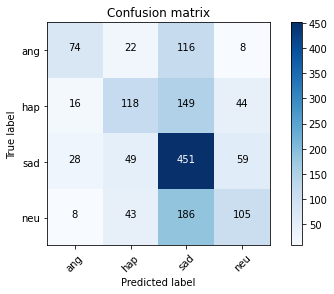

In [ ]:
# rf_classifier_split = RandomForestClassifier(n_estimators=600, min_samples_split=25)
# rf_classifier_split.fit(X_train_val_split_rf.drop(columns=['transcription']), y_train_val_split)

# # Predict
# pred_probs = rf_classifier_split.predict_proba(X_test_split_rf.drop(columns=['transcription']))

# # Results
# display_results(y_test_split, pred_probs)

In [ ]:
#rf_classifier_split

In [ ]:
# kfolds = 4

# param_grid = {'n_estimators': [400, 500, 600], 'min_samples_split':[25, 35, 50],'max_depth':[2, 4, 6] , 'min_samples_leaf':[2, 5, 10] }

In [ ]:
# rf_classifier_split = RandomForestClassifier(max_features='sqrt',random_state=100)
# model_cv = GridSearchCV(estimator = rf_classifier_split, param_grid=param_grid, scoring='accuracy',cv=kfolds,verbose=1, return_train_score=True,n_jobs=-1)
# model_cv.fit(X_train_val_split_rf.drop(columns=['transcription']), y_train_val_split )

In [ ]:
# cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results

In [ ]:
#model_cv.best_score_, model_cv.best_estimator_,model_cv.best_params_

Test Set Accuracy =  0.512
Test Set F-score =  0.457
Test Set Precision =  0.526
Test Set Recall =  0.444
Confusion matrix, without normalization
[[ 74  21 115  10]
 [ 14 122 148  43]
 [ 28  44 466  49]
 [ 10  40 199  93]]


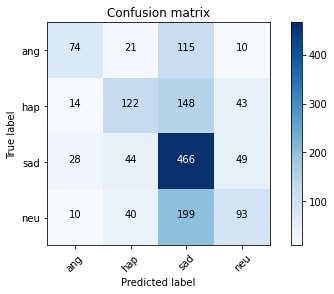

In [ ]:
# rf_classifier_split_final = RandomForestClassifier(max_features='sqrt',
#   #max_depth= 6,
#   #min_samples_leaf= 10,
#   min_samples_split= 25,
#   n_estimators = 600, random_state=100)
# rf_classifier_split_final.fit(X_train_val_split_rf.drop(columns=['transcription']), y_train_val_split)

# # Predict
# pred_probs_rf_split = rf_classifier_split_final.predict_proba(X_test_split_rf.drop(columns=['transcription']))

# # Results
# display_results(y_test_split, pred_probs_rf_split)

Test Set Accuracy =  0.473
Test Set F-score =  0.416
Test Set Precision =  0.505
Test Set Recall =  0.414
Confusion matrix, without normalization
[[ 59  12  89   8]
 [ 20  88 225 109]
 [ 22  35 504  63]
 [  1  16 253 114]]


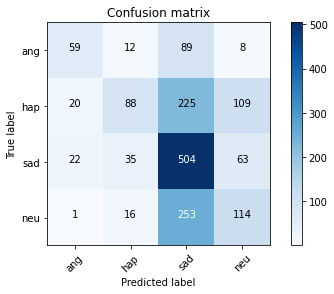

In [ ]:
# rf_classifier_session_based_rf = RandomForestClassifier(max_features='sqrt', 
#   #max_depth= 6,
#   #min_samples_leaf= 10,
#   min_samples_split= 25,
#   n_estimators = 600, random_state=100 )
# rf_classifier_session_based_rf.fit(X_train_val_session_based_rf.drop(columns=['transcription']), y_train_val_session_based_rf)

# # Predict
# pred_probs_sb_rf = rf_classifier_session_based_rf.predict_proba(X_test_session_based_rf.drop(columns=['transcription']))

# # Results
# display_results(y_test_session_based_rf, pred_probs_sb_rf)

In [ ]:
# from datetime import datetime

In [ ]:
# import joblib
# curr_dt_time = datetime.now()
# local_filepath = output_dir + '/' + 'model_rf_session_4_labels' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model_rf_0.473_'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.joblib'
# joblib.dump(rf_classifier_session_based_rf,local_filename)

['/content/drive/My Drive/IEMOCAP/model_outputs/model_rf_session_4_labels/model_rf_0.473_2021-10-2508_58_22.918630.joblib']

In [ ]:
# rf_test=joblib.load(local_filename)

Test Set Accuracy =  0.473
Test Set F-score =  0.416
Test Set Precision =  0.505
Test Set Recall =  0.414
Confusion matrix, without normalization
[[ 59  12  89   8]
 [ 20  88 225 109]
 [ 22  35 504  63]
 [  1  16 253 114]]


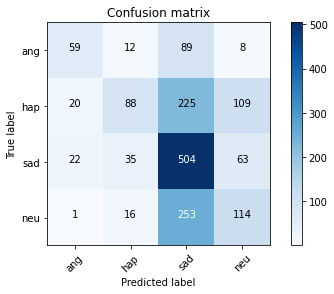

In [ ]:
# pred_rf_test = rf_test.predict_proba(X_test_session_based_rf.drop(columns=['transcription']))

## Results
# display_results(y_test_session_based_rf, pred_rf_test)

In [60]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [61]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [62]:
X_train_split_cnn = X_train_split.drop(columns=['transcription'])
X_val_split_cnn = X_val_split.drop(columns=['transcription'])
X_test_split_cnn = X_test_split.drop(columns=['transcription'])

In [63]:
X_val_split_cnn.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
3940,-0.599070,-0.315401,-0.624196,-0.215114,-0.608145,-0.321605,-0.606837,-0.045979,-1.137484,2.511142,-0.040505,-0.039855,-0.201528,-0.195217,-0.144573,-0.149527,-1.337956,1.499099,-2.053574,1.149942,-0.158688,-1.345397,1.723980,-0.646876,-0.174272,1.862520,-0.661156,0.491651,0.677755,-0.654028,1.812693,-0.008635,-1.085568,1.098657,-0.017089,0.652478,-0.362203,-1.729834,2.405571,-0.841961,...,-0.120059,-0.108260,-0.101017,-0.079908,-0.062609,-0.053535,-0.053207,-0.052265,-0.061943,-0.071794,-0.071508,-0.071704,-0.071997,-0.072312,-0.072623,-0.072921,-0.073200,-0.073460,-0.073700,-0.073923,-0.074128,-0.074317,-0.074491,-0.074650,-0.074797,-0.074933,-0.075056,-0.075170,-0.075272,-0.075366,-0.075451,-0.075527,-0.075595,-0.075656,-0.075710,-0.075754,-0.075791,-0.075821,-0.075845,-0.075858
2316,-0.056418,-0.001100,-0.125160,-0.043629,-0.054103,0.002461,-0.215987,-0.115583,0.133840,0.399119,0.002574,0.011596,-0.162344,-0.142425,-0.130927,-0.121726,0.516851,0.710850,-0.267585,-0.351331,1.070993,0.677196,-0.590180,-1.502598,-0.182057,0.010798,-0.728331,0.623675,1.214403,-0.485811,-0.760412,-0.409624,-1.375773,-0.338961,-0.193508,-2.383254,0.605108,0.480576,-0.069448,-0.487986,...,-0.117957,-0.106106,-0.100595,-0.079245,-0.062359,-0.053477,-0.053193,-0.052244,-0.061112,-0.066415,-0.066325,-0.066646,-0.067027,-0.067409,-0.067773,-0.068113,-0.068425,-0.068713,-0.068977,-0.069219,-0.069441,-0.069643,-0.069829,-0.069999,-0.070154,-0.070298,-0.070428,-0.070546,-0.070655,-0.070752,-0.070841,-0.070920,-0.070991,-0.071054,-0.071109,-0.071156,-0.071194,-0.071226,-0.071250,-0.071263
9328,-0.516919,0.279770,-0.504706,0.342266,-0.525337,0.274128,-0.447272,0.462911,0.407416,1.222586,-0.044440,0.017118,-0.196988,-0.189872,-0.052237,-0.062296,-0.795315,-0.348873,1.618556,-0.251777,-0.695938,0.397683,-0.594434,0.588695,0.769659,-0.365598,0.717024,0.006332,-0.189974,1.274745,0.298169,0.508666,1.785657,1.258633,1.709704,1.272534,0.705211,-0.781567,1.339874,-1.521964,...,-0.122080,-0.110993,-0.102887,-0.080198,-0.062654,-0.053551,-0.053207,-0.052253,-0.061458,-0.068443,-0.068117,-0.068255,-0.068488,-0.068744,-0.069000,-0.069246,-0.069477,-0.069692,-0.069890,-0.070074,-0.070243,-0.070399,-0.070542,-0.070674,-0.070794,-0.070906,-0.071007,-0.071100,-0.071183,-0.071260,-0.071330,-0.071391,-0.071447,-0.071498,-0.071541,-0.071576,-0.071607,-0.071632,-0.071651,-0.071661
9146,-0.306485,-0.275488,-0.186505,-0.130088,-0.289979,-0.268969,-0.013915,0.116899,1.437348,2.575570,0.007789,-0.017604,-0.161492,-0.157440,-0.133134,-0.142069,0.025272,-1.200278,0.852494,0.452793,-0.587605,0.517918,0.270364,0.037225,0.705058,0.174600,-0.310631,0.407253,0.973674,0.689574,0.196918,0.216931,0.534765,0.898998,0.564527,-0.269866,-0.016344,-1.628233,3.008372,-0.662657,...,-0.066577,-0.068533,-0.075630,-0.062409,-0.057382,-0.052822,-0.053128,-0.052261,-0.061940,-0.071775,-0.071490,-0.071686,-0.071979,-0.072294,-0.072605,-0.072902,-0.073181,-0.073440,-0.073680,-0.073902,-0.074108,-0.074296,-0.074470,-0.074629,-0.074776,-0.074912,-0.075035,-0.075148,-0.075251,-0.075344,-0.075429,-0.075505,-0.075573,-0.075633,-0.075687,-0.075731,-0.075769,-0.075799,-0.075822,-0.075836
8121,0.076695,0.049874,0.147304,0.045275,0.069262,0.038079

In [64]:
X_train_split_cnn = X_train_split_cnn.values.reshape(X_train_split_cnn.shape[0],X_train_split_cnn.shape[1],1)
X_val_split_cnn = X_val_split_cnn.values.reshape(X_val_split_cnn.shape[0],X_val_split_cnn.shape[1],1)
X_test_split_cnn = X_test_split_cnn.values.reshape(X_test_split_cnn.shape[0],X_test_split_cnn.shape[1],1)

In [65]:
### Try CNN Models

In [ ]:
# model_1d_split = Sequential()
# model_1d_split.add(Conv1D(254,5,padding='same',input_shape=(X_train_split_cnn[0].shape))) # there are 8 features
# model_1d_split.add(Activation('relu'))
# model_1d_split.add(Conv1D(128,5,padding='same'))
# model_1d_split.add(Dropout(0.1))
# model_1d_split.add(MaxPooling1D(pool_size=(8)))
# model_1d_split.add(Conv1D(128,5,padding='same'))
# model_1d_split.add(Activation('relu'))
# model_1d_split.add(Conv1D(128,5,padding='same'))
# model_1d_split.add(Activation('relu'))
# model_1d_split.add(Flatten())
# model_1d_split.add(Dense(4))
# model_1d_split.add(Activation('softmax'))
# opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
# model_1d_split.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 524, 254)          1524      
_________________________________________________________________
activation (Activation)      (None, 524, 254)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 524, 128)          162688    
_________________________________________________________________
dropout (Dropout)            (None, 524, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 65, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 65, 128)           82048     
_________________________________________________________________
activation_1 (Activation)    (None, 65, 128)           0

In [66]:
def plot_history(history_model):
    # summarize history for accuracy
    plt.plot(history_model.history['sparse_categorical_accuracy'])
    plt.plot(history_model.history['val_sparse_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('categorical accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history_model.history['loss'])
    plt.plot(history_model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [68]:
from datetime import datetime

In [69]:
output_dir

'/content/drive/My Drive/IEMOCAP/model_outputs'

In [ ]:
# curr_dt_time = datetime.now()
# local_filepath = output_dir+'/'+'model_init_1d_4_labels' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'
# #print(filepath)
# model_checkpoint = ModelCheckpoint(filepath=local_filename,
#                                   save_weights_only=False)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.0000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [ ]:
# model_1d_split.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['sparse_categorical_accuracy'])

In [ ]:
# model_1d_split_hist = model_1d_split.fit(X_train_split_cnn, y_train_split, batch_size=32,epochs=30, validation_data=(X_val_split_cnn,y_val_split),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
148/148 [==============================] - 19s 12ms/step - loss: 1.2403 - sparse_categorical_accuracy: 0.4403 - val_loss: 1.2496 - val_sparse_categorical_accuracy: 0.4559
Epoch 2/30
148/148 [==============================] - 1s 10ms/step - loss: 1.1597 - sparse_categorical_accuracy: 0.4845 - val_loss: 1.2225 - val_sparse_categorical_accuracy: 0.4915
Epoch 3/30
148/148 [==============================] - 1s 10ms/step - loss: 1.1179 - sparse_categorical_accuracy: 0.5157 - val_loss: 1.2107 - val_sparse_categorical_accuracy: 0.5085
Epoch 4/30
148/148 [==============================] - 1s 10ms/step - loss: 1.0721 - sparse_categorical_accuracy: 0.5367 - val_loss: 1.1616 - val_sparse_categorical_accuracy: 0.4847
Epoch 5/30
148/148 [==============================] - 1s 10ms/step - loss: 1.0237 - sparse_categorical_accuracy: 0.5650 - val_loss: 1.1694 - val_sparse_categorical_accuracy: 0.5025

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 6/30
1

In [ ]:
# model_1d_split_hist.history

{'loss': [1.2402949333190918,
  1.1596957445144653,
  1.117896318435669,
  1.0720868110656738,
  1.0237460136413574,
  0.9159663915634155,
  0.8732398152351379],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.000100000005, 1.0000001e-05],
 'sparse_categorical_accuracy': [0.44025424122810364,
  0.4845339059829712,
  0.5156779885292053,
  0.5366525650024414,
  0.5650423765182495,
  0.621610164642334,
  0.6402542591094971],
 'val_loss': [1.249566912651062,
  1.2225152254104614,
  1.2106564044952393,
  1.1615833044052124,
  1.1693655252456665,
  1.2056732177734375,
  1.197283148765564],
 'val_sparse_categorical_accuracy': [0.4559321999549866,
  0.49152541160583496,
  0.508474588394165,
  0.4847457706928253,
  0.5025423765182495,
  0.506779670715332,
  0.505084753036499]}

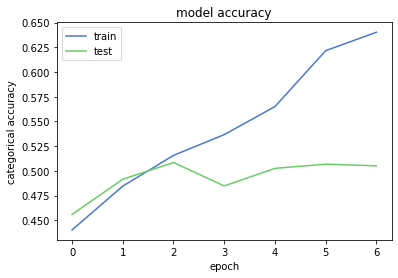

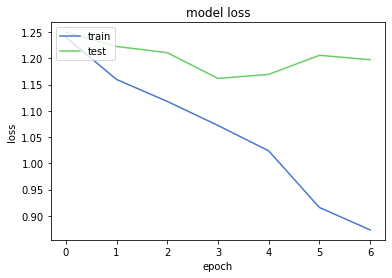

In [ ]:
# plot_history(model_1d_split_hist)

In [ ]:
# pred_y_1d_split = model_1d_split.predict(X_test_split_cnn)

In [ ]:
# pred_y_1d_split.shape

(1476, 4)

In [ ]:
#pred_y_split = np.argmax(pred_y_split,axis=1)

In [ ]:
#pred_y_split.shape

In [ ]:
#pred_y_split.shape

Test Set Accuracy =  0.516
Test Set F-score =  0.485
Test Set Precision =  0.518
Test Set Recall =  0.472
Confusion matrix, without normalization
[[ 90  22  92  16]
 [ 23 137 134  33]
 [ 47  57 411  72]
 [ 11  43 165 123]]


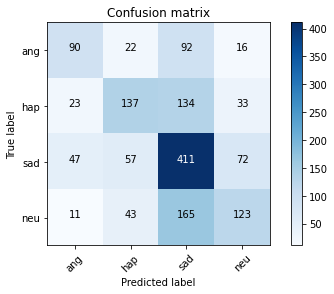

In [ ]:
# display_results(y_test_split, pred_y_1d_split)

In [ ]:
#model_1d_split_hist = model_1d_split.fit(X_train_split_cnn, y_train_split, batch_size=64,epochs=30, validation_data=(X_val_split_cnn,y_val_split),callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
#model_1d_split_hist = model_1d_split.fit(X_train_split_cnn, y_train_split, batch_size=16,epochs=30, validation_data=(X_val_split_cnn,y_val_split),callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
#plot_history(model_1d_split_hist)

In [ ]:
#pred_y_1d_split = model_1d_split.predict(X_test_split_cnn)

In [ ]:
#pred_y_1d_split.shape

In [ ]:
#display_results(y_test_split, pred_y_1d_split)

In [ ]:
#from sklearn.metrics import balanced_accuracy_score

In [ ]:
#balanced_accuracy_score(y_test_split, np.argmax(pred_y_split,axis=1))

In [70]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [71]:
from datetime import datetime

In [ ]:
# curr_dt_time = datetime.now()
# local_filepath = output_dir+'/'+'model_init_2d_4_labels' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_') +'.h5'
# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
# model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
#                                   save_weights_only=False)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.0000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [72]:
X_train_split_cnn_2d = np.expand_dims(X_train_split_cnn, -1)
X_val_split_cnn_2d = np.expand_dims(X_val_split_cnn, -1)
X_test_split_cnn_2d = np.expand_dims(X_test_split_cnn, -1)

In [73]:
X_train_split_cnn.shape

(4720, 524, 1)

In [ ]:
# #ip = tf.keras.layers.Input(shape=X_train_split_cnn[0].shape)

# model_split_2d = Sequential()
# model_split_2d.add(Conv2D(256,5,padding='same',input_shape=(X_train_split_cnn.shape[1],1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
# model_split_2d.add(Activation('relu'))
# model_split_2d.add(Conv2D(128,5,padding='same'))
# model_split_2d.add(Dropout(0.1))
# #model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
# model_split_2d.add(Conv2D(128,5,padding='same'))
# model_split_2d.add(Activation('relu'))
# model_split_2d.add(Flatten())
# model_split_2d.add(Dense(4))
# model_split_2d.add(Activation('softmax'))
# #opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
# model_split_2d.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['sparse_categorical_accuracy'])
# model_history_split_2d = model_split_2d.fit(X_train_split_cnn_2d, 
#               y_train_split,
#               epochs=30,
#               batch_size=32,
#               validation_data=(X_val_split_cnn_2d, y_val_split),
#               callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
148/148 [==============================] - 6s 34ms/step - loss: 1.2255 - sparse_categorical_accuracy: 0.4426 - val_loss: 1.1847 - val_sparse_categorical_accuracy: 0.4805
Epoch 2/30
148/148 [==============================] - 5s 32ms/step - loss: 1.1284 - sparse_categorical_accuracy: 0.5091 - val_loss: 1.1656 - val_sparse_categorical_accuracy: 0.5093
Epoch 3/30
148/148 [==============================] - 5s 32ms/step - loss: 1.0700 - sparse_categorical_accuracy: 0.5434 - val_loss: 1.2196 - val_sparse_categorical_accuracy: 0.4941

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
148/148 [==============================] - 5s 32ms/step - loss: 0.9691 - sparse_categorical_accuracy: 0.5985 - val_loss: 1.2063 - val_sparse_categorical_accuracy: 0.5220

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/30
148/148 [==============================] - 5s 32ms/step - loss: 0.9358 - sparse_categorical_accuracy:

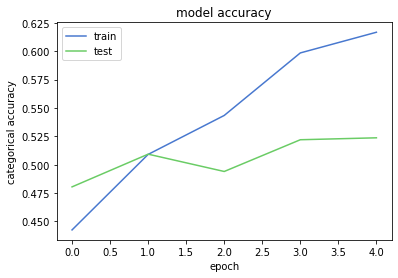

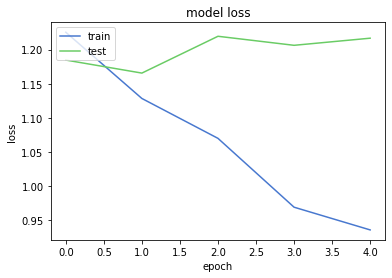

In [ ]:
# plot_history(model_history_split_2d)

In [ ]:
# pred_y_2d_split = model_split_2d.predict(X_test_split_cnn_2d)

Test Set Accuracy =  0.509
Test Set F-score =  0.481
Test Set Precision =  0.506
Test Set Recall =  0.471
Confusion matrix, without normalization
[[ 94  30  81  15]
 [ 29 143 121  34]
 [ 49  59 396  83]
 [ 10  42 172 118]]


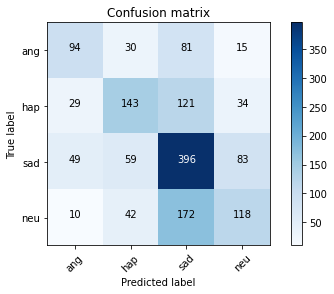

In [ ]:
# display_results(y_test_split, pred_y_2d_split)

In [ ]:
# model_split_2d.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['sparse_categorical_accuracy'])
# model_history_split_2d = model_split_2d.fit(X_train_split_cnn_2d, 
#               y_train_split,
#               epochs=30,
#               batch_size=64,
#               validation_data=(X_val_split_cnn_2d, y_val_split),
#               callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
#plot_history(model_history_split_2d)

In [ ]:
#pred_y_2d_split = model_split_2d.predict(X_test_split_cnn_2d)

In [ ]:
#display_results(y_test_split, pred_y_2d_split)

In [ ]:
# model_split_2d.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['sparse_categorical_accuracy'])
# model_history_split_2d = model_split_2d.fit(X_train_split_cnn_2d, 
#               y_train_split,
#               epochs=30,
#               batch_size=16,
#               validation_data=(X_val_split_cnn_2d, y_val_split),
#               callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
#plot_history(model_history_split_2d)

In [ ]:
#pred_y_2d_split = model_split_2d.predict(X_test_split_cnn_2d)

In [ ]:
#display_results(y_test_split, pred_y_2d_split)

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [75]:
from transformers import BertTokenizer, TFBertModel, BertConfig, RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [76]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_split = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [77]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [78]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [79]:
MODEL_NAME = 'distilbert-base-uncased'

In [80]:
MAX_LENGTH = 114

tokenizer_dbert_split = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
        
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [81]:
X_train_dbert_split_text = tokenize(X_train_split['transcription'], tokenizer_dbert_split)
X_test_dbert_split_text = tokenize(X_test_split['transcription'], tokenizer_dbert_split)
X_val_dbert_split_text = tokenize(X_val_split['transcription'], tokenizer_dbert_split)

100%|██████████| 1180/1180 [00:00<00:00, 2404.28it/s]


In [82]:
config_db_split = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_split = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_db_split)

input_ids_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_db_split = DistilBERT_split(input_ids = input_ids_in_db_split, attention_mask = input_masks_in_db_split)[0]
X_db_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_db_split)
X_db_split = tf.keras.layers.GlobalMaxPool1D()(X_db_split)
X_db_split = tf.keras.layers.Dense(64, activation='relu')(X_db_split)
X_db_split = tf.keras.layers.Dropout(0.2)(X_db_split)
X_db_split = tf.keras.layers.Dense(4, activation='softmax')(X_db_split)

model_dbert_split = tf.keras.Model(inputs=[input_ids_in_db_split, input_masks_in_db_split], outputs = X_db_split)

# for layer in model_dbert_split.layers[:3]:
#     layer.trainable = False

model_dbert_split.summary()

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 114, 256)     918528      tf_distil_bert_model[0][13]  

In [ ]:
# curr_dt_time = datetime.now()
# local_filepath = output_dir+'/'+'model_init_dbert_split_4_labels' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'
# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
# model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
#                                   save_weights_only=True)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.0000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [ ]:
# y_val_split.shape

(1180,)

In [ ]:
# model_dbert_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_dbert_split = model_dbert_split.fit(X_train_dbert_split_text, 
#                     y_train_split, 
#                     epochs = 30,
#                     batch_size=32, 
#                     validation_data=(X_val_dbert_split_text, y_val_split), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
148/148 [==============================] - 31s 139ms/step - loss: 1.1992 - sparse_categorical_accuracy: 0.4619 - val_loss: 1.1310 - val_sparse_categorical_accuracy: 0.5195
Epoch 2/30
148/148 [==============================] - 18s 121ms/step - loss: 1.0846 - sparse_categorical_accuracy: 0.5424 - val_loss: 1.1250 - val_sparse_categorical_accuracy: 0.5246

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
148/148 [==============================] - 18s 121ms/step - loss: 0.9903 - sparse_categorical_accuracy: 0.5864 - val_loss: 1.0578 - val_sparse_categorical_accuracy: 0.5602
Epoch 4/30
148/148 [==============================] - 18s 121ms/step - loss: 0.9426 - sparse_categorical_accuracy: 0.6053 - val_loss: 1.0483 - val_sparse_categorical_accuracy: 0.5746

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/30
148/148 [==============================] - 18s 121ms/step - loss: 0.9268 - sparse_categorical

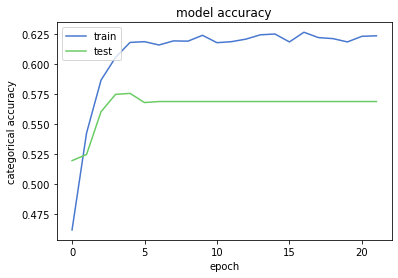

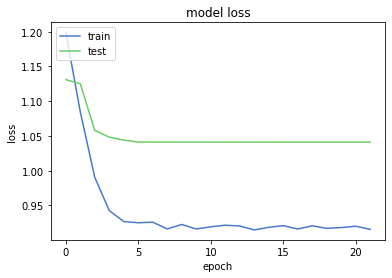

In [ ]:
# plot_history(model_history_dbert_split)

In [ ]:
# pred_y_dbert_split = model_dbert_split.predict(X_test_dbert_split_text)

Test Set Accuracy =  0.562
Test Set F-score =  0.532
Test Set Precision =  0.564
Test Set Recall =  0.518
Confusion matrix, without normalization
[[ 82  20 100  18]
 [  8 180  86  53]
 [ 36  52 418  81]
 [ 14  45 133 150]]


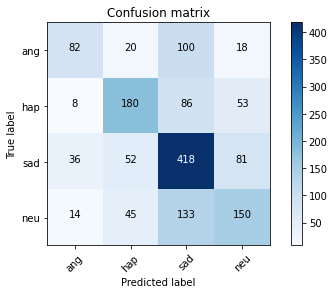

In [ ]:
# display_results(y_test_split, pred_y_dbert_split)

In [83]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_split = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [84]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [85]:
from transformers import BertTokenizer, BertConfig, TFBertModel, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [86]:
MODEL_NAME = 'bert-base-uncased'

In [87]:
MAX_LENGTH = 114

tokenizer_bert_split = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
        
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [88]:
X_train_bert_split_text = tokenize(X_train_split['transcription'], tokenizer_bert_split)
X_test_bert_split_text = tokenize(X_test_split['transcription'], tokenizer_bert_split)
X_val_bert_split_text = tokenize(X_val_split['transcription'], tokenizer_bert_split)

100%|██████████| 1180/1180 [00:00<00:00, 2387.50it/s]


In [89]:
config_bert_split = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_split = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_split)

input_ids_in_bert_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_split = BERT_split(input_ids = input_ids_in_bert_split, attention_mask = input_masks_in_bert_split)[0]
X_bert_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_split)
X_bert_split = tf.keras.layers.GlobalMaxPool1D()(X_bert_split)
X_bert_split = tf.keras.layers.Dense(64, activation='relu')(X_bert_split)
X_bert_split = tf.keras.layers.Dropout(0.2)(X_bert_split)
X_bert_split = tf.keras.layers.Dense(4, activation='softmax')(X_bert_split)

model_bert_split = tf.keras.Model(inputs=[input_ids_in_bert_split, input_masks_in_bert_split], outputs = X_bert_split)

for layer in model_bert_split.layers[:3]:
    layer.trainable = False

model_bert_split.summary()

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 114, 256)     918528      tf_bert_model[0][25]       

In [ ]:
# curr_dt_time = datetime.now()
# local_filepath = output_dir+'/'+'model_init_bert_split_4_labels' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
# model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
#                                   save_weights_only=True)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.0000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [ ]:
# y_val_split.shape

(1180,)

In [ ]:
# model_bert_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_bert_split = model_bert_split.fit(X_train_bert_split_text, 
#                     y_train_split, 
#                     epochs = 25,
#                     batch_size=32, 
#                     validation_data=(X_val_bert_split_text, y_val_split), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
148/148 [==============================] - 54s 249ms/step - loss: 1.1851 - sparse_categorical_accuracy: 0.4746 - val_loss: 1.0662 - val_sparse_categorical_accuracy: 0.5542
Epoch 2/25
148/148 [==============================] - 33s 223ms/step - loss: 1.0637 - sparse_categorical_accuracy: 0.5377 - val_loss: 1.0340 - val_sparse_categorical_accuracy: 0.5644
Epoch 3/25
148/148 [==============================] - 33s 224ms/step - loss: 0.9683 - sparse_categorical_accuracy: 0.5924 - val_loss: 1.0181 - val_sparse_categorical_accuracy: 0.5712
Epoch 4/25
148/148 [==============================] - 33s 223ms/step - loss: 0.8946 - sparse_categorical_accuracy: 0.6242 - val_loss: 0.9846 - val_sparse_categorical_accuracy: 0.5737
Epoch 5/25
148/148 [==============================] - 33s 223ms/step - loss: 0.8303 - sparse_categorical_accuracy: 0.6544 - val_loss: 0.9757 - val_sparse_categorical_accuracy: 0.5975

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epo

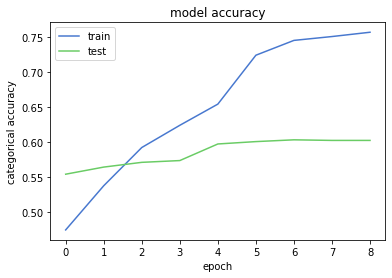

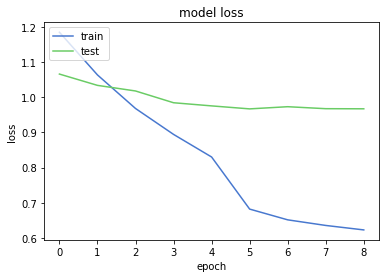

In [ ]:
# plot_history(model_history_bert_split)

In [ ]:
# pred_y_bert_split = model_bert_split.predict(X_test_bert_split_text)

Test Set Accuracy =  0.633
Test Set F-score =  0.619
Test Set Precision =  0.637
Test Set Recall =  0.607
Confusion matrix, without normalization
[[113  12  82  13]
 [ 10 216  50  51]
 [ 43  35 424  85]
 [  7  42 111 182]]


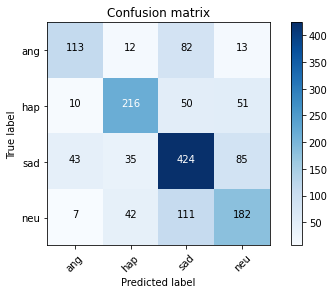

In [ ]:
# display_results(y_test_split, pred_y_bert_split)

In [90]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [91]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

#Want RoBERTa instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer_roberta_split = tokenizer_class.from_pretrained(pretrained_weights)
model_roberta_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [92]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_roberta_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 119


In [93]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [94]:
MODEL_NAME = 'roberta-base'

In [95]:
MAX_LENGTH = 119

tokenizer_roberta_split = RobertaTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
        
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [96]:
X_train_roberta_split_text = tokenize(X_train_split['transcription'], tokenizer_roberta_split)
X_test_roberta_split_text = tokenize(X_test_split['transcription'], tokenizer_roberta_split)
X_val_roberta_split_text = tokenize(X_val_split['transcription'], tokenizer_roberta_split)

100%|██████████| 1180/1180 [00:00<00:00, 4227.74it/s]


In [97]:
config_roberta_split = RobertaConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
RoBERTa_split = TFRobertaModel.from_pretrained(MODEL_NAME, config=config_roberta_split)

input_ids_in_roberta_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_roberta_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_roberta_split = RoBERTa_split(input_ids = input_ids_in_roberta_split, attention_mask = input_masks_in_roberta_split)[0]
X_roberta_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_roberta_split)
X_roberta_split = tf.keras.layers.GlobalMaxPool1D()(X_roberta_split)
X_roberta_split = tf.keras.layers.Dense(64, activation='relu')(X_roberta_split)
X_roberta_split = tf.keras.layers.Dropout(0.2)(X_roberta_split)
X_roberta_split = tf.keras.layers.Dense(4, activation='softmax')(X_roberta_split)

model_roberta_split = tf.keras.Model(inputs=[input_ids_in_roberta_split, input_masks_in_roberta_split], outputs = X_roberta_split)

for layer in model_roberta_split.layers[:3]:
    layer.trainable = False

model_roberta_split.summary()

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 119)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 119)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 124645632   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 119, 256)     918528      tf_roberta_model[0][25]    

In [ ]:
# curr_dt_time = datetime.now()
# local_filepath = output_dir + '/' + 'model_init_roberta_split_4_labels' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
# model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
#                                   save_weights_only=True)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.0000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [ ]:
# y_val_split.shape

(1180,)

In [ ]:
# model_roberta_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_roberta_split = model_roberta_split.fit(X_train_roberta_split_text, 
#                     y_train_split, 
#                     epochs = 30,
#                     batch_size=32, 
#                     validation_data=(X_val_roberta_split_text, y_val_split), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
148/148 [==============================] - 55s 254ms/step - loss: 1.3014 - sparse_categorical_accuracy: 0.4011 - val_loss: 1.2154 - val_sparse_categorical_accuracy: 0.4653
Epoch 2/30
148/148 [==============================] - 34s 228ms/step - loss: 1.1725 - sparse_categorical_accuracy: 0.4767 - val_loss: 1.1128 - val_sparse_categorical_accuracy: 0.5161
Epoch 3/30
148/148 [==============================] - 34s 228ms/step - loss: 1.0871 - sparse_categorical_accuracy: 0.5354 - val_loss: 1.0763 - val_sparse_categorical_accuracy: 0.5297
Epoch 4/30
148/148 [==============================] - 34s 228ms/step - loss: 0.9912 - sparse_categorical_accuracy: 0.5761 - val_loss: 1.0642 - val_sparse_categorical_accuracy: 0.5492
Epoch 5/30
148/148 [==============================] - 34s 228ms/step - loss: 0.9360 - sparse_categorical_accuracy: 0.6061 - val_loss: 1.0088 - val_sparse_categorical_accuracy: 0.5814
Epoch 6/30
148/148 [==============================] - 34s 227ms/step - loss: 0.8739 -

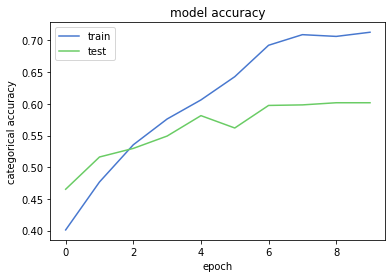

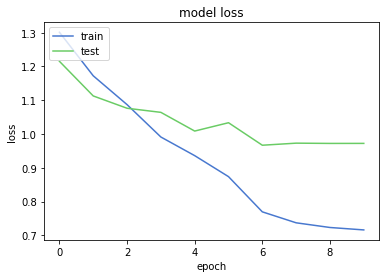

In [ ]:
# plot_history(model_history_roberta_split)

In [ ]:
# pred_y_roberta_split = model_roberta_split.predict(X_test_roberta_split_text)

Test Set Accuracy =  0.621
Test Set F-score =  0.598
Test Set Precision =  0.621
Test Set Recall =  0.586
Confusion matrix, without normalization
[[100  13  97  10]
 [ 10 220  55  42]
 [ 33  46 430  78]
 [ 13  54 109 166]]


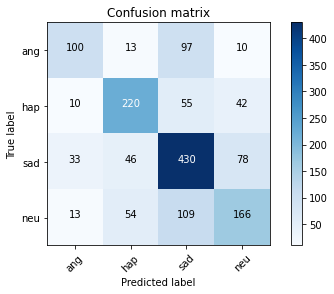

In [ ]:
# display_results(y_test_split, pred_y_roberta_split)

In [ ]:
#Session based

In [99]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [100]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [101]:
X_train_session_based_cnn = X_train_session_based.drop(columns=['transcription'])
X_val_session_based_cnn = X_val_session_based.drop(columns=['transcription'])
X_test_session_based_cnn = X_test_session_based.drop(columns=['transcription'])

In [102]:
X_val_session_based_cnn.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
5764,-0.444692,-0.375650,-0.428720,-0.396974,-0.450822,-0.383953,-0.368949,-0.394332,0.991968,0.205824,-0.066958,-0.090614,-0.193072,-0.184785,-0.168448,-0.175700,-0.870037,-0.934701,1.815130,-0.222261,-0.193799,0.844181,-0.619504,1.108685,0.206621,-0.620977,2.221604,0.119870,-1.165531,1.390323,0.573015,1.616102,2.688749,0.211780,1.621328,2.377472,-0.447571,-0.062356,0.704723,-0.502659,...,-0.134926,-0.126454,-0.119607,-0.099798,-0.082926,-0.073055,-0.071442,-0.071595,-0.069901,-0.032182,-0.033264,-0.034036,-0.034619,-0.035085,-0.035471,-0.035799,-0.036081,-0.036329,-0.036547,-0.036742,-0.036916,-0.037072,-0.037214,-0.037341,-0.037457,-0.037562,-0.037657,-0.037744,-0.037822,-0.037893,-0.037957,-0.038014,-0.038065,-0.038110,-0.038149,-0.038182,-0.038210,-0.038232,-0.038247,-0.038257
5765,-0.128369,-0.160192,-0.116738,-0.199178,-0.135276,-0.164607,-0.066968,-0.236773,0.991968,0.140888,-0.015213,-0.038853,-0.163213,-0.142872,-0.157042,-0.159750,0.295957,-0.566969,0.930711,-1.075966,-1.494256,0.939173,-0.196992,-0.062620,1.423862,0.014100,0.095611,1.276732,0.471533,-0.303958,-0.428248,0.818584,0.874237,-0.546756,-0.018006,0.792683,0.204178,-0.378350,0.086196,0.411913,...,-0.131283,-0.119355,-0.106350,-0.092031,-0.081511,-0.072820,-0.071396,-0.071589,-0.069784,-0.031930,-0.032994,-0.033752,-0.034327,-0.034785,-0.035166,-0.035489,-0.035768,-0.036012,-0.036228,-0.036420,-0.036592,-0.036747,-0.036887,-0.037013,-0.037128,-0.037232,-0.037326,-0.037412,-0.037489,-0.037560,-0.037623,-0.037680,-0.037730,-0.037775,-0.037813,-0.037846,-0.037874,-0.037896,-0.037911,-0.037921
5766,-0.280346,0.731342,-0.356227,0.626545,-0.294641,0.765448,-0.453176,0.346888,-0.947018,-0.508470,-0.046322,-0.015205,-0.191106,-0.183946,-0.004944,-0.015600,-0.310546,0.361483,0.083484,0.667336,2.242126,0.431522,-0.127350,0.667963,-1.171165,-0.540036,0.606899,-1.081429,-0.141677,0.437547,-1.799277,-0.992903,0.042076,-1.163547,0.771084,1.311103,1.638712,0.089460,-0.487264,-2.748755,...,-0.128349,-0.119880,-0.115952,-0.096692,-0.079894,-0.072765,-0.071423,-0.071590,-0.069766,-0.031890,-0.032948,-0.033703,-0.034275,-0.034731,-0.035109,-0.035429,-0.035706,-0.035949,-0.036163,-0.036354,-0.036525,-0.036678,-0.036817,-0.036942,-0.037056,-0.037159,-0.037252,-0.037338,-0.037414,-0.037484,-0.037547,-0.037603,-0.037653,-0.037698,-0.037735,-0.037768,-0.037795,-0.037817,-0.037832,-0.037842
5767,0.004391,-0.154506,0.102464,-0.229171,-0.006670,-0.171051,0.245986,-0.341415,0.706823,-0.898085,-0.044374,-0.031971,-0.118748,-0.036464,-0.160858,-0.154566,0.312273,-2.237647,1.326457,-0.697639,-0.123697,1.816895,-0.812649,-0.178668,-0.298857,-1.103318,1.984731,0.056604,-2.678568,0.317018,-0.212907,-2.106348,-0.449234,-1.766769,-1.112071,1.139339,-0.052787,0.471997,1.090711,0.639412,...,-0.131291,-0.123404,-0.118171,-0.097834,-0.081836,-0.072725,-0.071424,-0.071595,-0.069905,-0.032188,-0.033268,-0.034037,-0.034618,-0.035082,-0.035466,-0.035792,-0.036073,-0.036319,-0.036536,-0.036729,-0.036902,-0.037057,-0.037197,-0.037324,-0.037439,-0.037543,-0.037637,-0.037724,-0.037801,-0.037871,-0.037934,-0.037991,-0.038042,-0.038087,-0.038125,-0.038157,-0.038185,-0.038207,-0.038222,-0.038232
5768,0.639985,0.303600,0.454524,0.207059,0.636771,0.3

In [103]:
X_train_session_based_cnn = X_train_session_based_cnn.values.reshape(X_train_session_based_cnn.shape[0],X_train_session_based_cnn.shape[1],1)
X_val_session_based_cnn = X_val_session_based_cnn.values.reshape(X_val_session_based_cnn.shape[0],X_val_session_based_cnn.shape[1],1)
X_test_session_based_cnn = X_test_session_based_cnn.values.reshape(X_test_session_based_cnn.shape[0],X_test_session_based_cnn.shape[1],1)

In [104]:
### Try CNN Models

In [ ]:
# model_1d_session_based = Sequential()
# model_1d_session_based.add(Conv1D(254,5,padding='same',input_shape=(X_train_session_based_cnn[0].shape))) # there are 8 features
# model_1d_session_based.add(Activation('relu'))
# model_1d_session_based.add(Conv1D(128,5,padding='same'))
# model_1d_session_based.add(Dropout(0.1))
# model_1d_session_based.add(MaxPooling1D(pool_size=(8)))
# model_1d_session_based.add(Conv1D(128,5,padding='same'))
# model_1d_session_based.add(Activation('relu'))
# model_1d_session_based.add(Conv1D(128,5,padding='same'))
# model_1d_session_based.add(Activation('relu'))
# model_1d_session_based.add(Flatten())
# model_1d_session_based.add(Dense(4))
# model_1d_session_based.add(Activation('softmax'))
# opt_sb = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
# model_1d_session_based.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 524, 254)          1524      
_________________________________________________________________
activation_7 (Activation)    (None, 524, 254)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 524, 128)          162688    
_________________________________________________________________
dropout_98 (Dropout)         (None, 524, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 65, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 65, 128)           82048     
_________________________________________________________________
activation_8 (Activation)    (None, 65, 128)          

In [ ]:
# def plot_history(history_model):
#     # summarize history for accuracy
#     plt.plot(history_model.history['sparse_categorical_accuracy'])
#     plt.plot(history_model.history['val_sparse_categorical_accuracy'])
#     plt.title('model accuracy')
#     plt.ylabel('categorical accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()
#     # summarize history for loss
#     plt.plot(history_model.history['loss'])
#     plt.plot(history_model.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()

In [105]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [106]:
from datetime import datetime

In [ ]:
# curr_dt_time = datetime.now()
# local_filepath = output_dir + '/' + 'model_init_1d_session_4_labels' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'

# #print(filepath)
# model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
#                                   save_weights_only=False)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.00000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [ ]:
# model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])

In [ ]:
# model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=32,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
133/133 [==============================] - 3s 13ms/step - loss: 1.2297 - sparse_categorical_accuracy: 0.4510 - val_loss: 1.3132 - val_sparse_categorical_accuracy: 0.4167
Epoch 2/30
133/133 [==============================] - 1s 10ms/step - loss: 1.1533 - sparse_categorical_accuracy: 0.4913 - val_loss: 1.2631 - val_sparse_categorical_accuracy: 0.4279
Epoch 3/30
133/133 [==============================] - 1s 10ms/step - loss: 1.0957 - sparse_categorical_accuracy: 0.5236 - val_loss: 1.2129 - val_sparse_categorical_accuracy: 0.4577
Epoch 4/30
133/133 [==============================] - 1s 10ms/step - loss: 1.0423 - sparse_categorical_accuracy: 0.5612 - val_loss: 1.4611 - val_sparse_categorical_accuracy: 0.4220

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
133/133 [==============================] - 1s 10ms/step - loss: 0.9264 - sparse_categorical_accuracy: 0.6130 - val_loss: 1.3369 - val_sparse_categorical_accuracy: 0.4630

Epoch 00005:

In [ ]:
# model_1d_session_based_hist.history

{'loss': [1.229661226272583,
  1.153266191482544,
  1.0956515073776245,
  1.0423310995101929,
  0.9263647794723511,
  0.8933116793632507],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.000100000005, 1.0000001e-05],
 'sparse_categorical_accuracy': [0.4510127305984497,
  0.49128592014312744,
  0.5235515832901001,
  0.5612341165542603,
  0.6130475997924805,
  0.6333019137382507],
 'val_loss': [1.3131943941116333,
  1.2631182670593262,
  1.2128827571868896,
  1.4611207246780396,
  1.3369454145431519,
  1.3426004648208618],
 'val_sparse_categorical_accuracy': [0.4166666567325592,
  0.42791005969047546,
  0.45767197012901306,
  0.42195767164230347,
  0.46296295523643494,
  0.46097883582115173]}

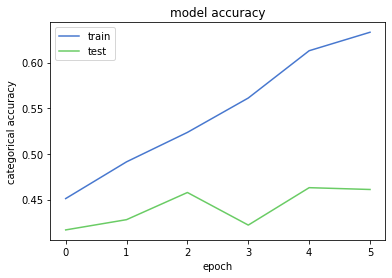

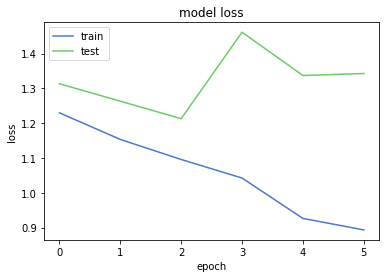

In [ ]:
# plot_history(model_1d_session_based_hist)

In [ ]:
# pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

In [ ]:
# pred_y_session_based.shape

(1618, 4)

In [ ]:
#pred_y_split = np.argmax(pred_y_split,axis=1)

In [ ]:
#pred_y_split.shape

In [ ]:
#pred_y_split.shape

Test Set Accuracy =  0.452
Test Set F-score =  0.405
Test Set Precision =  0.496
Test Set Recall =  0.390
Confusion matrix, without normalization
[[ 45  23  80  20]
 [  8 126 209  99]
 [ 13  52 454 105]
 [  0  45 232 107]]


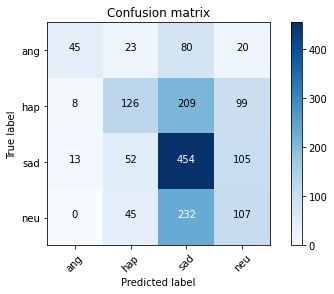

In [ ]:
# display_results(y_test_session_based, pred_y_session_based)

In [ ]:
# model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])
# model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=128,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
#plot_history(model_1d_session_based_hist)

In [ ]:
#pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

In [ ]:
#display_results(y_test_session_based, pred_y_session_based)

In [ ]:
# model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])
# model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=1024,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
#plot_history(model_1d_session_based_hist)

In [ ]:
#pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

In [ ]:
#display_results(y_test_session_based, pred_y_session_based)

In [ ]:
#from sklearn.metrics import balanced_accuracy_score

In [ ]:
#balanced_accuracy_score(y_test_split, np.argmax(pred_y_split,axis=1))

In [107]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [108]:
from datetime import datetime

In [ ]:
# curr_dt_time = datetime.now()
# local_filepath = output_dir + '/' +'model_init_2d_session_4_labels' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
# model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
#                                   save_weights_only=False)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.0000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [109]:
X_train_session_based_cnn_2d = np.expand_dims(X_train_session_based_cnn, -1)
X_val_session_based_cnn_2d = np.expand_dims(X_val_session_based_cnn, -1)
X_test_session_based_cnn_2d = np.expand_dims(X_test_session_based_cnn, -1)

In [110]:
X_train_session_based_cnn.shape

(4246, 524, 1)

In [ ]:
#ip = tf.keras.layers.Input(shape=X_train_split_cnn[0].shape)

# model_session_based_2d = Sequential()
# model_session_based_2d.add(Conv2D(256,5,padding='same',input_shape=(X_train_session_based_cnn.shape[1],1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
# model_session_based_2d.add(Activation('relu'))
# model_session_based_2d.add(Conv2D(128,5,padding='same'))
# model_session_based_2d.add(Dropout(0.1))
# #model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
# model_session_based_2d.add(Conv2D(128,5,padding='same'))
# model_session_based_2d.add(Activation('relu'))
# model_session_based_2d.add(Flatten())
# model_session_based_2d.add(Dense(4))
# model_session_based_2d.add(Activation('softmax'))
# #opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
# model_session_based_2d.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['sparse_categorical_accuracy'])
# model_history_session_based_2d = model_session_based_2d.fit(X_train_session_based_cnn_2d, 
#               y_train_session_based,
#               epochs=30,
#               batch_size=32,
#               validation_data=(X_val_session_based_cnn_2d, y_val_session_based),
#               callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
133/133 [==============================] - 5s 36ms/step - loss: 1.2031 - sparse_categorical_accuracy: 0.4609 - val_loss: 1.3204 - val_sparse_categorical_accuracy: 0.4187
Epoch 2/30
133/133 [==============================] - 4s 33ms/step - loss: 1.0983 - sparse_categorical_accuracy: 0.5306 - val_loss: 1.3213 - val_sparse_categorical_accuracy: 0.4061

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
133/133 [==============================] - 4s 33ms/step - loss: 0.9975 - sparse_categorical_accuracy: 0.5787 - val_loss: 1.3334 - val_sparse_categorical_accuracy: 0.4127

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/30
133/133 [==============================] - 4s 33ms/step - loss: 0.9661 - sparse_categorical_accuracy: 0.5916 - val_loss: 1.3395 - val_sparse_categorical_accuracy: 0.4206

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00004: early stopping


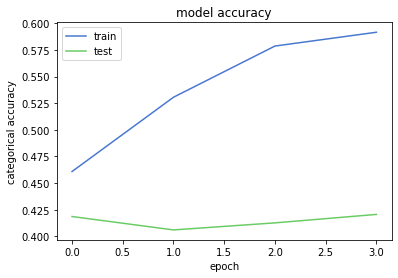

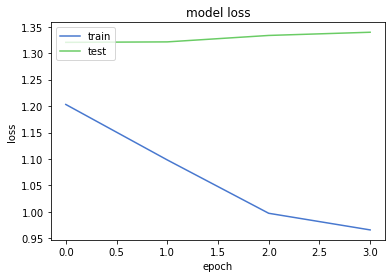

In [ ]:
# plot_history(model_history_session_based_2d)

In [ ]:
# pred_y_2d_session_based = model_session_based_2d.predict(X_test_session_based_cnn_2d)

Test Set Accuracy =  0.425
Test Set F-score =  0.391
Test Set Precision =  0.467
Test Set Recall =  0.395
Confusion matrix, without normalization
[[ 57  14  69  28]
 [ 18  68 178 178]
 [ 28  28 380 188]
 [  4  14 183 183]]


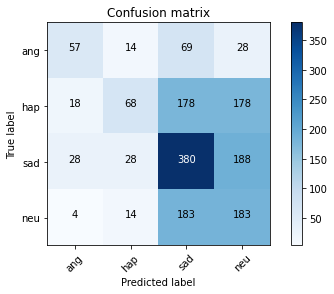

In [ ]:
# display_results(y_test_session_based, pred_y_2d_session_based)

In [ ]:
# model_session_based_2d.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['sparse_categorical_accuracy'])
# model_history_session_based_2d = model_session_based_2d.fit(X_train_session_based_cnn_2d, 
#               y_train_session_based,
#               epochs=30,
#               batch_size=128,
#               validation_data=(X_val_session_based_cnn_2d, y_val_session_based),
#               callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
#plot_history(model_history_session_based_2d)

In [ ]:
#pred_y_2d_session_based = model_session_based_2d.predict(X_test_session_based_cnn_2d)

In [ ]:
#display_results(y_test_session_based, pred_y_2d_session_based)

In [111]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [112]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [114]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [115]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [116]:
MODEL_NAME = 'distilbert-base-uncased'

In [117]:
MAX_LENGTH = 114

tokenizer_dbert_sb = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
       
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [118]:
X_train_dbert_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_dbert_sb)
X_test_dbert_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_dbert_sb)
X_val_dbert_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_dbert_sb)

100%|██████████| 1512/1512 [00:00<00:00, 2303.27it/s]


In [119]:
config_dbert_sb = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_sb = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_dbert_sb)

input_ids_in_dbert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_dbert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_dbert_sb = DistilBERT_sb(input_ids = input_ids_in_dbert_sb, attention_mask = input_masks_in_dbert_sb)[0]
X_dbert_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_dbert_sb)
X_dbert_sb = tf.keras.layers.GlobalMaxPool1D()(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dense(64, activation='relu')(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dropout(0.2)(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dense(4, activation='softmax')(X_dbert_sb)

model_dbert_session_based = tf.keras.Model(inputs=[input_ids_in_dbert_sb, input_masks_in_dbert_sb], outputs = X_dbert_sb)

for layer in model_dbert_session_based.layers[:3]:
    layer.trainable = False

model_dbert_session_based.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_1 (TFDisti TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_1[0][1

In [ ]:
# curr_dt_time = datetime.now()
# local_filepath = output_dir + '/' + 'model_init_dbert_sb_4_labels' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'

# model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
#                                   save_weights_only=True)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.0000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [ ]:
# y_val_session_based.shape

(1512,)

In [ ]:
# model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 25,
#                     batch_size=32, 
#                     validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
133/133 [==============================] - 30s 148ms/step - loss: 1.2004 - sparse_categorical_accuracy: 0.4677 - val_loss: 1.1744 - val_sparse_categorical_accuracy: 0.4874
Epoch 2/25
133/133 [==============================] - 17s 130ms/step - loss: 1.1038 - sparse_categorical_accuracy: 0.5231 - val_loss: 1.1155 - val_sparse_categorical_accuracy: 0.5053
Epoch 3/25
133/133 [==============================] - 17s 130ms/step - loss: 1.0174 - sparse_categorical_accuracy: 0.5636 - val_loss: 1.0747 - val_sparse_categorical_accuracy: 0.5324
Epoch 4/25
133/133 [==============================] - 17s 130ms/step - loss: 0.9623 - sparse_categorical_accuracy: 0.5827 - val_loss: 1.1128 - val_sparse_categorical_accuracy: 0.5357

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/25
133/133 [==============================] - 17s 130ms/step - loss: 0.8357 - sparse_categorical_accuracy: 0.6561 - val_loss: 1.0701 - val_sparse_categorical_accuracy: 0.5529

Ep

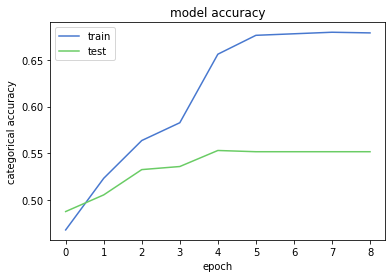

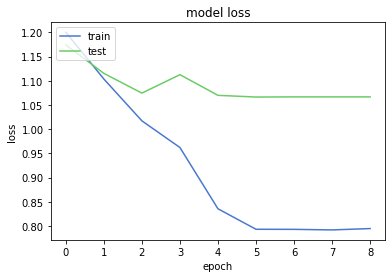

In [ ]:
# plot_history(model_history_dbert_session_based)

In [ ]:
# pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

Test Set Accuracy =  0.615
Test Set F-score =  0.586
Test Set Precision =  0.604
Test Set Recall =  0.578
Confusion matrix, without normalization
[[ 78  11  60  19]
 [ 12 252  99  79]
 [ 52  33 452  87]
 [ 14  33 124 213]]


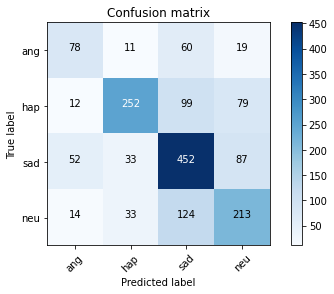

In [ ]:
# display_results(y_test_session_based,pred_y_dbert_session_based)

In [ ]:
# model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 25,
#                     batch_size=256, 
#                     validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
#plot_history(model_history_dbert_session_based)

In [ ]:
#pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

In [ ]:
#display_results(y_test_session_based,pred_y_dbert_session_based)

In [ ]:
# model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 25,
#                     batch_size=256, 
#                     validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
#plot_history(model_history_dbert_session_based)

In [ ]:
#pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

In [ ]:
#display_results(y_test_session_based,pred_y_dbert_session_based)

In [120]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [121]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [122]:
from transformers import BertTokenizer, TFBertModel, BertConfig

In [123]:
MODEL_NAME = 'bert-base-uncased'

In [124]:
MAX_LENGTH = 114

tokenizer_bert_sb = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [125]:
X_train_bert_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_bert_sb)
X_test_bert_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_bert_sb)
X_val_bert_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_bert_sb)

100%|██████████| 1512/1512 [00:00<00:00, 2276.27it/s]


In [126]:
config_bert_sb = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_sb = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_sb)

input_ids_in_bert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_sb = BERT_sb(input_ids = input_ids_in_bert_sb, attention_mask = input_masks_in_bert_sb)[0]
X_bert_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_sb)
X_bert_sb = tf.keras.layers.GlobalMaxPool1D()(X_bert_sb)
X_bert_sb = tf.keras.layers.Dense(64, activation='relu')(X_bert_sb)
X_bert_sb = tf.keras.layers.Dropout(0.2)(X_bert_sb)
X_bert_sb = tf.keras.layers.Dense(4, activation='softmax')(X_bert_sb)

model_bert_session_based = tf.keras.Model(inputs=[input_ids_in_bert_sb, input_masks_in_bert_sb], outputs = X_bert_sb)

for layer in model_bert_session_based.layers[:3]:
    layer.trainable = False

model_bert_session_based.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 114, 256)     918528      tf_bert_model_1[0][25]     

In [ ]:
# curr_dt_time = datetime.now()
# local_filepath = output_dir + '/' + 'model_init_bert_sb_4_labels' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
# model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
#                                   save_weights_only=True)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.0000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [ ]:
# y_val_session_based.shape

(1512,)

In [ ]:
# model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 30,
#                     batch_size=32, 
#                     validation_data=(X_val_bert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
133/133 [==============================] - 53s 270ms/step - loss: 1.1907 - sparse_categorical_accuracy: 0.4760 - val_loss: 1.1072 - val_sparse_categorical_accuracy: 0.5165
Epoch 2/30
133/133 [==============================] - 32s 241ms/step - loss: 1.0559 - sparse_categorical_accuracy: 0.5457 - val_loss: 1.0534 - val_sparse_categorical_accuracy: 0.5450
Epoch 3/30
133/133 [==============================] - 32s 241ms/step - loss: 0.9771 - sparse_categorical_accuracy: 0.5843 - val_loss: 1.0346 - val_sparse_categorical_accuracy: 0.5496
Epoch 4/30
133/133 [==============================] - 32s 241ms/step - loss: 0.8994 - sparse_categorical_accuracy: 0.6201 - val_loss: 1.0477 - val_sparse_categorical_accuracy: 0.5489

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
133/133 [==============================] - 32s 241ms/step - loss: 0.7806 - sparse_categorical_accuracy: 0.6882 - val_loss: 0.9960 - val_sparse_categorical_accuracy: 0.5642
Epo

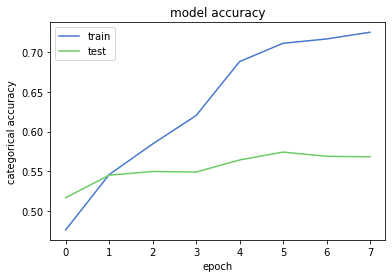

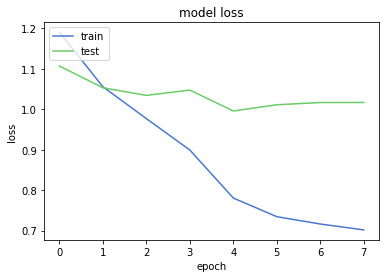

In [ ]:
# plot_history(model_history_bert_session_based)

In [ ]:
# model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 30,
#                     batch_size=256, 
#                     validation_data=(X_val_bert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
#plot_history(model_history_bert_session_based)

In [ ]:
# pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

Test Set Accuracy =  0.627
Test Set F-score =  0.599
Test Set Precision =  0.614
Test Set Recall =  0.594
Confusion matrix, without normalization
[[ 84  10  57  17]
 [ 11 260  91  80]
 [ 54  26 458  86]
 [ 22  32 117 213]]


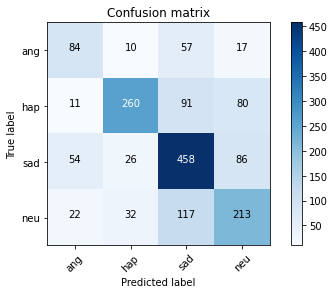

In [ ]:
# display_results(y_test_session_based,pred_y_bert_session_based)

In [ ]:
#pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

In [ ]:
#display_results(y_test_session_based,pred_y_bert_session_based)

In [ ]:
# model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 30,
#                     batch_size=256, 
#                     validation_data=(X_val_bert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
#plot_history(model_history_bert_session_based)

In [ ]:
#pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

In [ ]:
#display_results(y_test_session_based,pred_y_bert_session_based)

In [128]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want RoBERTa instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer_roberta_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_roberta_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [129]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_roberta_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 119


In [130]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig

In [131]:
MODEL_NAME = 'roberta-base'

In [132]:
MAX_LENGTH = 119

tokenizer_robert_sb = RobertaTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [133]:
X_train_roberta_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_roberta_sb)
X_test_roberta_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_roberta_sb)
X_val_roberta_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_roberta_sb)

100%|██████████| 1512/1512 [00:00<00:00, 4287.03it/s]


In [134]:
config_roberta_sb = RobertaConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
RoBERTa_sb = TFRobertaModel.from_pretrained(MODEL_NAME, config=config_roberta_sb)

input_ids_in_roberta_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_roberta_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_roberta_sb = RoBERTa_sb(input_ids = input_ids_in_roberta_sb, attention_mask = input_masks_in_roberta_sb)[0]
X_roberta_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_roberta_sb)
X_roberta_sb = tf.keras.layers.GlobalMaxPool1D()(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dense(64, activation='relu')(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dropout(0.2)(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dense(4, activation='softmax')(X_roberta_sb)

model_roberta_session_based = tf.keras.Model(inputs=[input_ids_in_roberta_sb, input_masks_in_roberta_sb], outputs = X_roberta_sb)

for layer in model_roberta_session_based.layers[:3]:
    layer.trainable = False

model_roberta_session_based.summary()

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 119)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 119)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model_1 (TFRobertaMo TFBaseModelOutputWit 124645632   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 119, 256)     918528      tf_roberta_model_1[0][25]  

In [ ]:
# curr_dt_time = datetime.now()
# local_filename = output_dir + '/' + 'model_init_roberta_sb_4_labels' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
# model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
#                                   save_weights_only=True)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.0000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [135]:
# y_val_session_based.shape

In [ ]:
# model_roberta_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_roberta_session_based = model_roberta_session_based.fit(X_train_roberta_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 30,
#                     batch_size=32, 
#                     validation_data=(X_val_roberta_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
133/133 [==============================] - 54s 275ms/step - loss: 1.2769 - sparse_categorical_accuracy: 0.4072 - val_loss: 1.2077 - val_sparse_categorical_accuracy: 0.4769
Epoch 2/30
133/133 [==============================] - 33s 246ms/step - loss: 1.1375 - sparse_categorical_accuracy: 0.5042 - val_loss: 1.1290 - val_sparse_categorical_accuracy: 0.5146
Epoch 3/30
133/133 [==============================] - 33s 246ms/step - loss: 1.0486 - sparse_categorical_accuracy: 0.5497 - val_loss: 1.1734 - val_sparse_categorical_accuracy: 0.4987

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
133/133 [==============================] - 33s 246ms/step - loss: 0.9478 - sparse_categorical_accuracy: 0.6081 - val_loss: 1.0816 - val_sparse_categorical_accuracy: 0.5417
Epoch 5/30
133/133 [==============================] - 33s 246ms/step - loss: 0.9193 - sparse_categorical_accuracy: 0.6171 - val_loss: 1.0789 - val_sparse_categorical_accuracy: 0.5397

Ep

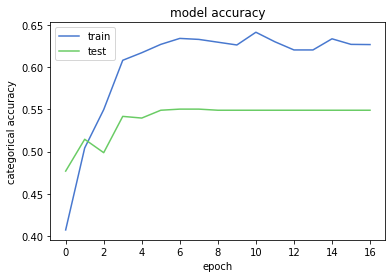

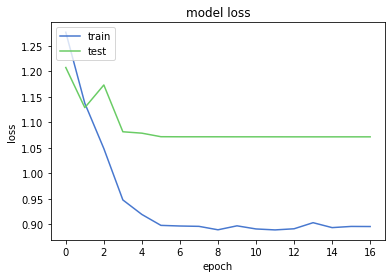

In [ ]:
# plot_history(model_history_roberta_session_based)

In [ ]:
# model_roberta_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_roberta_session_based = model_roberta_session_based.fit(X_train_roberta_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 30,
#                     batch_size=256, 
#                     validation_data=(X_val_roberta_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

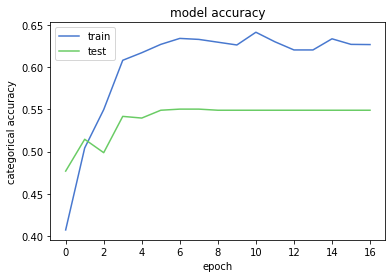

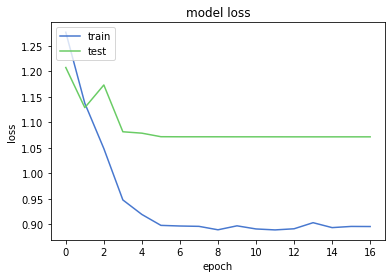

In [ ]:
# plot_history(model_history_roberta_session_based)

In [ ]:
# pred_y_roberta_session_based = model_roberta_session_based.predict(X_test_roberta_session_based_text)

Test Set Accuracy =  0.589
Test Set F-score =  0.565
Test Set Precision =  0.577
Test Set Recall =  0.561
Confusion matrix, without normalization
[[ 83  15  59  11]
 [ 19 249 103  71]
 [ 56  54 431  83]
 [ 17  29 148 190]]


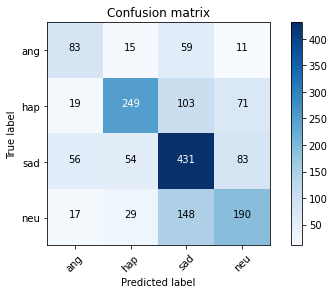

In [ ]:
# display_results(y_test_session_based,pred_y_roberta_session_based)

In [ ]:
### Ensemble

In [136]:
from sklearn.ensemble import VotingClassifier
import joblib

In [137]:
model_1d_name = output_dir+'/model_init_1d_session_4_labels/'+'model-00003-0.52355-1.09565-0.45767-1.212882021-10-2509_35_56.752474.h5'
model_2d_name = output_dir +'/model_init_2d_session_4_labels/' + 'model-00002-0.53062-1.09828-0.40608-1.321262021-10-2509_36_07.504845.h5'
model_rf_name = output_dir + '/model_rf_session_4_labels/' + 'model_rf_0.473_2021-10-2508_58_22.918630' + '.joblib'

In [138]:
model_1d_ens = keras.models.load_model(model_1d_name)
model_2d_ens = keras.models.load_model(model_2d_name)
model_rf_ens = joblib.load(model_rf_name)

In [139]:
y_ens_1d_pred = model_1d_ens.predict(X_test_session_based_cnn)

In [140]:
y_ens_2d_pred = model_2d_ens.predict(X_test_session_based_cnn_2d)

In [141]:
y_ens_rf_pred = model_rf_ens.predict_proba(X_test_session_based_rf.drop(columns='transcription'))

In [142]:
y_ens_rf_pred.shape

(1618, 4)

In [ ]:
# # For DistilBERT:
# model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# ## Want BERT instead of distilBERT? Uncomment the following line:
# #model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# # Load pretrained model/tokenizer
# tokenizer_dbert_sb_ens = tokenizer_class.from_pretrained(pretrained_weights)
# model_dbert_session_based_ens = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# max_val = 0
# for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
#     try:
#         sent_tok_len = len(tokenizer_dbert_sb_ens.tokenize(sent))
#         max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
#     except:
#         pass
    
# print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
# from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
# MODEL_NAME = 'distilbert-base-uncased'

In [ ]:
# MAX_LENGTH = 114

# tokenizer_dbert_sb_ens = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
#                                                 add_special_tokens=True,
#                                                 max_length=MAX_LENGTH, 
#                                                 pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
       
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
# config_dbert_sb_ens = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
# DistilBERT_sb_ens = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_dbert_sb_ens)

# input_ids_in_dbert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
# input_masks_in_dbert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

# embedding_layer_dbert_sb_ens = DistilBERT_sb_ens(input_ids = input_ids_in_dbert_sb_ens, attention_mask = input_masks_in_dbert_sb_ens)[0]
# X_dbert_sb_ens = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_dbert_sb_ens)
# X_dbert_sb_ens = tf.keras.layers.GlobalMaxPool1D()(X_dbert_sb_ens)
# X_dbert_sb_ens = tf.keras.layers.Dense(64, activation='relu')(X_dbert_sb_ens)
# X_dbert_sb_ens = tf.keras.layers.Dropout(0.2)(X_dbert_sb_ens)
# X_dbert_sb_ens = tf.keras.layers.Dense(4, activation='softmax')(X_dbert_sb_ens)

# model_dbert_session_based_ens = tf.keras.Model(inputs=[input_ids_in_dbert_sb_ens, input_masks_in_dbert_sb_ens], outputs = X_dbert_sb_ens)

# #for layer in model_dbert_session_based.layers[:3]:
# #    layer.trainable = False

# model_dbert_session_based_ens.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_3 (TFDisti TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_7 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_3[0][1

In [143]:
model_dbert_session_based.load_weights(output_dir+'/model_init_dbert_sb_4_labels/'+'model-00005-0.65615-0.83566-0.55291-1.070062021-10-2509_38_13.601296.h5')

In [145]:
y_ens_dbert_session_based_pred = model_dbert_session_based.predict(X_test_dbert_session_based_text)

In [ ]:
# # For DistilBERT:
# #model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# ## Want BERT instead of distilBERT? Uncomment the following line:
# model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# # Load pretrained model/tokenizer
# tokenizer_bert_sb_ens = tokenizer_class.from_pretrained(pretrained_weights)
# model_bert_session_based_ens = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# max_val = 0
# for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
#     try:
#         sent_tok_len = len(tokenizer_bert_sb_ens.tokenize(sent))
#         max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
#     except:
#         pass
    
# print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
# from transformers import BertTokenizer, TFBertModel, BertConfig

In [ ]:
# MODEL_NAME = 'bert-base-uncased'

In [ ]:
# MAX_LENGTH = 114

# tokenizer_bert_sb_ens = BertTokenizer.from_pretrained(MODEL_NAME,  
#                                                 add_special_tokens=True,
#                                                 max_length=MAX_LENGTH, 
#                                                 pad_to_max_length=True)

# # def tokenize(sentences, tokenizer):
# #     input_ids, input_masks, input_segments = [], [], []
# #     for sentence in tqdm(sentences):
# #         inputs = tokenizer.encode_plus(sentence, 
# #                                        add_special_tokens=True, 
# #                                        max_length=MAX_LENGTH, 
# #                                        pad_to_max_length=True, 
# #                                        return_attention_mask=True, 
# #                                        return_token_type_ids=True, 
# #                                        truncation=True)
# #         input_ids.append(inputs['input_ids'])
# #         input_masks.append(inputs['attention_mask'])
# #         input_segments.append(inputs['token_type_ids'])        
# #        
# #    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
# config_bert_sb_ens = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
# BERT_sb_ens = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_sb_ens)

# input_ids_in_bert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
# input_masks_in_bert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

# embedding_layer_bert_sb_ens = BERT_sb(input_ids = input_ids_in_bert_sb_ens, attention_mask = input_masks_in_bert_sb_ens)[0]
# X_bert_sb_ens = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_sb_ens)
# X_bert_sb_ens = tf.keras.layers.GlobalMaxPool1D()(X_bert_sb_ens)
# X_bert_sb_ens = tf.keras.layers.Dense(64, activation='relu')(X_bert_sb_ens)
# X_bert_sb_ens = tf.keras.layers.Dropout(0.2)(X_bert_sb_ens)
# X_bert_sb_ens = tf.keras.layers.Dense(4, activation='softmax')(X_bert_sb_ens)

# model_bert_session_based_ens = tf.keras.Model(inputs=[input_ids_in_bert_sb_ens, input_masks_in_bert_sb_ens], outputs = X_bert_sb_ens)

# #for layer in model_bert_session_based.layers[:3]:
# #    layer.trainable = False

# model_bert_session_based_ens.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_8 (Bidirectional) (None, 114, 256)     918528      tf_bert_model_1[1][25]     

In [147]:
model_bert_session_based.load_weights(output_dir+'/model_init_bert_sb_4_labels/model-00005-0.68818-0.78062-0.56415-0.996022021-10-2509_43_10.178389'+'.h5')

In [148]:
y_ens_bert_session_based_pred = model_bert_session_based.predict(X_test_bert_session_based_text)

In [150]:
model_roberta_session_based.load_weights(output_dir+'/model_init_bert_sb_4_labels/model-00011-0.64131-0.89090-0.54894-1.071712021-10-2509_49_19.029267'+'.h5')

In [151]:
y_ens_roberta_session_based_pred = model_roberta_session_based.predict(X_test_roberta_session_based_text)

In [ ]:
# y_ens_1d_pred.shape

(1646, 6)

In [ ]:
#model_roberta_session_based.load_weights(output_dir+'/model_init_roberta_sb_4_labels/model-00011-0.64131-0.89090-0.54894-1.071712021-10-2509_49_19.029267'+'.h5')

In [152]:
def pred_and_display(y_ens_list, weights, y_test_inputs):
  y_ens_summed_pred = tensordot(y_ens_list, weights, axes=((0),(0)))
  display_results(y_test_inputs, y_ens_summed_pred)

In [153]:
y_ens_all_pred = array([y_ens_rf_pred, y_ens_1d_pred,y_ens_2d_pred,y_ens_dbert_session_based_pred,y_ens_bert_session_based_pred,y_ens_roberta_session_based_pred])

Test Set Accuracy =  0.646
Test Set F-score =  0.621
Test Set Precision =  0.668
Test Set Recall =  0.602
Confusion matrix, without normalization
[[ 84   8  63  13]
 [  7 252 107  76]
 [ 34  19 511  60]
 [  6  16 163 199]]


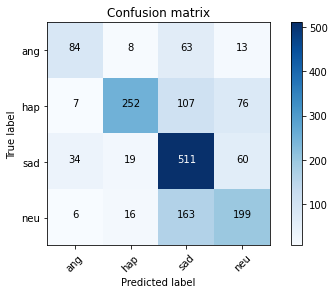

In [154]:
pred_and_display(y_ens_all_pred,[1,1,1,2,2,2],y_test_session_based)

Test Set Accuracy =  0.642
Test Set F-score =  0.619
Test Set Precision =  0.674
Test Set Recall =  0.596
Confusion matrix, without normalization
[[ 83   7  66  12]
 [  7 246 111  78]
 [ 29  19 514  62]
 [  4  14 170 196]]


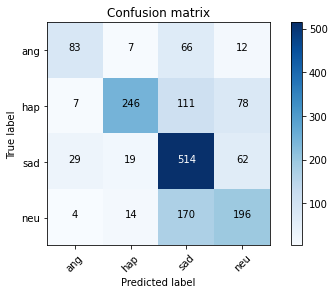

In [155]:
pred_and_display(y_ens_all_pred,[1,1,2,2,2,2],y_test_session_based)

Test Set Accuracy =  0.633
Test Set F-score =  0.610
Test Set Precision =  0.679
Test Set Recall =  0.585
Confusion matrix, without normalization
[[ 81   6  70  11]
 [  7 231 125  79]
 [ 26  18 518  62]
 [  1  10 179 194]]


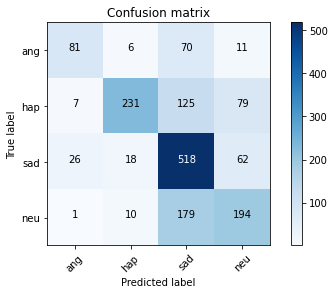

In [156]:
pred_and_display(y_ens_all_pred,[1,1,1,1,1,1],y_test_session_based)

Test Set Accuracy =  0.643
Test Set F-score =  0.619
Test Set Precision =  0.667
Test Set Recall =  0.598
Confusion matrix, without normalization
[[ 83   8  64  13]
 [  7 252 106  77]
 [ 32  20 507  65]
 [  5  16 165 198]]


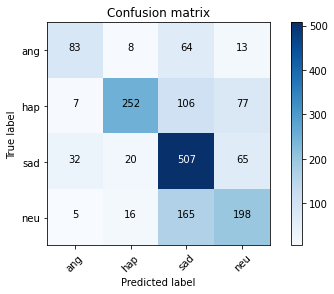

In [158]:
pred_and_display(y_ens_all_pred,[1,1,2,3,2,2],y_test_session_based)

Test Set Accuracy =  0.650
Test Set F-score =  0.627
Test Set Precision =  0.666
Test Set Recall =  0.610
Confusion matrix, without normalization
[[ 88   8  59  13]
 [  7 256 105  74]
 [ 34  23 505  62]
 [  9  19 153 203]]


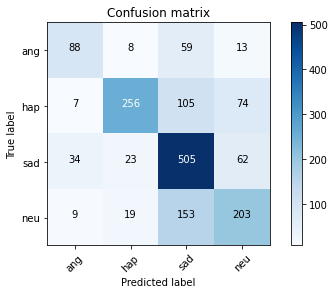

In [159]:
pred_and_display(y_ens_all_pred,[1,1,1,3,3,3],y_test_session_based)

Test Set Accuracy =  0.648
Test Set F-score =  0.624
Test Set Precision =  0.663
Test Set Recall =  0.607
Confusion matrix, without normalization
[[ 86   7  62  13]
 [  7 258 104  73]
 [ 35  24 502  63]
 [  9  20 152 203]]


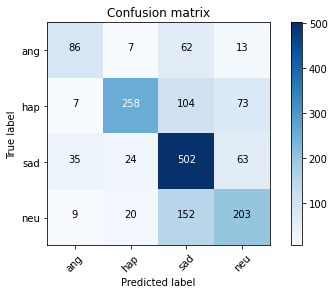

In [162]:
pred_and_display(y_ens_all_pred,[2,1,1,4,4,4],y_test_session_based)

In [ ]:
y_ens_summed_pred = tensordot(y_ens_all_pred, [1,1,3,6], axes=((0),(0)))

In [ ]:
y_ens_summed_pred.shape

(1618, 4)

Test Set Accuracy =  0.619
Test Set F-score =  0.593
Test Set Precision =  0.642
Test Set Recall =  0.576
Confusion matrix, without normalization
[[ 78   8  66  16]
 [  6 226 113  97]
 [ 40  18 489  77]
 [  3  19 153 209]]


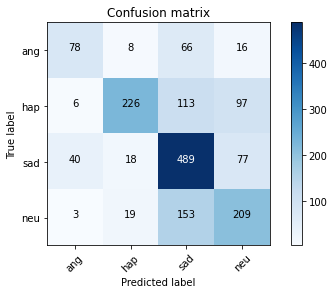

In [ ]:
display_results(y_test_session_based,y_ens_summed_pred)

In [ ]:
model_combined_split_db_1 = VotingClassifier(estimators=[('m1ds', model_1d_ens), ('m2ds', model_2d_ens)], voting='soft')

In [ ]:
model_combined_split_db_1.predict_proba(X_train_split)